# Produisez une √©tude de march√©

# Sc√©nario
Votre entreprise **d'agroalimentaire** souhaite se d√©velopper √† l'international. Elle est sp√©cialis√©e dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **√† cibler plus particuli√®rement certains pays**, dans le but d'approfondir ensuite l'√©tude de march√©. Plus particuli√®rement, l'id√©al serait de produire des "groupes" de pays, plus ou moins gros, dont on conna√Æt les caract√©ristiques.

Dans un premier temps, la strat√©gie est plut√¥t d'exporter les produits plut√¥t que de produire sur place, c'est-√†-dire dans le(s) nouveau(x) pays cibl√©(s).


Pour identifier les pays propices √† une insertion dans le march√© du poulet,
 Il vous a √©t√© demand√© de cibler les pays. 
 Etudier les r√©gimes alimentaires de chaque pays, notamment en termes de prot√©ines d'origine animale et en termes de calories.


Construisez votre √©chantillon contenant l'ensemble des pays disponibles, chacun caract√©ris√© par ces variables :

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;
disponibilit√© alimentaire en prot√©ines par habitant ;
disponibilit√© alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. V√©rifiez donc qu'ils diff√®rent r√©ellement. Pour cela, r√©alisez les tests statistiques suivants :

un test d'ad√©quation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez d√©termin√©. Sur ces 2 clusters, testez la variable gaussienne gr√¢ce √† un test de comparaison.

In [90]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn.cluster import KMeans
from sklearn import cluster


In [91]:
#Versions utilis√©es
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [92]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [93]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1: Construisez un √©chantillon contenant l'ensemble des pays disponibles, chacun caract√©ris√© par ces variables :\

diff√©rence de population entre une ann√©e ant√©rieure (au choix) et l'ann√©e courante, exprim√©e en pourcentage ;\
proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays ;\
disponibilit√© alimentaire en prot√©ines par habitant ;\
disponibilit√© alimentaire en calories par habitant.

# 1. Import des donn√©es

## 1.1 Import et traitement de la population par pays
la variation de la population entre 2013 et 2019, en %, qui sera positive en cas de croissance ou n√©gative en cas de baisse d√©mographique ;

Sources FAO (http://www.fao.org/faostat/fr/#data)

In [94]:
df_population = pd.read_csv('datas/fao-populations_2019- 2013.csv' , header=0, sep=",", decimal=".")
df_population.head(5)

Code Domaine                       Domaine  Code zone (FAO)            Zone  \
0           OA  S√©ries temporelles annuelles                2     Afghanistan   
1           OA  S√©ries temporelles annuelles                2     Afghanistan   
2           OA  S√©ries temporelles annuelles              202  Afrique du Sud   
3           OA  S√©ries temporelles annuelles              202  Afrique du Sud   
4           OA  S√©ries temporelles annuelles                3         Albanie   

   Code √âl√©ment            √âl√©ment  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code ann√©e  Ann√©e           Unit√©     Valeur Symbole  \
0        2013   2013  1000 personnes  32269.589       X   
1        2019   2019  1000 personnes  38041.754       X   
2        2013   2013  1000 personnes  53687.121       X   
3        2019   2019  1000 personnes  58558.270       X   
4        2013   2013  1000 personnes   2903.790       X   

          Description du Symbole Note  
0  Sources internationales s√ªres  NaN  
1  Sources internationales s√ªres  NaN  
2  Sources internationales s√ªres  NaN  
3  Sources internationales s√ªres  NaN  
4  Sources internationales s√ªres  NaN

In [95]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Ann√©e', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

Code zone (FAO)            Zone                 Produit  Ann√©e      Valeur
0                2     Afghanistan  Population-Estimations   2013  32269589.0
1                2     Afghanistan  Population-Estimations   2019  38041754.0
2              202  Afrique du Sud  Population-Estimations   2013  53687121.0
3              202  Afrique du Sud  Population-Estimations   2019  58558270.0
4                3         Albanie  Population-Estimations   2013   2903790.0

In [96]:
df_population = df_population.pivot_table(index=['Code zone (FAO)', 'Zone'], columns='Ann√©e', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head()

Ann√©e  Code zone (FAO)               Zone        2013        2019
0                    1            Arm√©nie   2897588.0   2957731.0
1                    2        Afghanistan  32269589.0  38041754.0
2                    3            Albanie   2903790.0   2880917.0
3                    4            Alg√©rie  38140133.0  43053054.0
4                    5  Samoa am√©ricaines     55713.0     55312.0

In [97]:
# diff√©rence de population entre 2013 et 2019, exprim√©e en pourcentage
df_population['Evolution population (%)'] = round(((df_population[2019]-df_population[2013])/df_population[2013])*100,3)


In [98]:
population2013 = df_population[2013].sum()
population2019 = df_population[2019].sum()
evolution_globale = round(((population2019 - population2013) / population2013)*100,3)
print('Pour indication, la population totale en 2013 √©tait de', population2013, 'et de', population2019, 'en 2019.\nL\'√©volution 2013/2019 est de', evolution_globale, '%.')


Pour indication, la population totale en 2013 √©tait de 8633816910.0 et de 9179381901.0 en 2019.
L'√©volution 2013/2019 est de 6.319 %.


In [99]:
df_population= df_population.rename(columns= {2019: 'population', 'Code zone (FAO)':'Code zone'})
df_population= df_population[['Code zone', 'Zone' , 'population' ,'Evolution population (%)']]
df_population.head(2)


Ann√©e  Code zone         Zone  population  Evolution population (%)
0              1      Arm√©nie   2957731.0                     2.076
1              2  Afghanistan  38041754.0                    17.887

## 1.2 Donn√©es sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantit√© de prot√©ines d‚Äôorigine animale et la quantit√© totale de prot√©ines consomm√©es ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [100]:
df_dispo_alimentaire = pd.read_csv('datas/FAOSTAT_data.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   

   Code √âl√©ment                                            √âl√©ment  \
0           664     Disponibilit√© alimentaire (Kcal/personne/jour)   
1           674  Disponibilit√© de prot√©ines en quantit√© (g/pers...   
2           684  Disponibilit√© de mati√®re grasse en quantit√© (g...   
3           664     Disponibilit√© alimentaire (Kcal/personne/jour)   

   Code Produit           Produit  Code ann√©e  Ann√©e               Unit√©  \
0          2901     Total General        2019   2019  Kcal/personne/jour   
1          2901     Total General        2019   2019     g/personne/jour   
2          2901     Total General        2019   2019     g/personne/jour   
3          2941  Produits Animaux        2019   2019  Kcal/personne/jour   

    Valeur Symbole Description du Symbole  
0  2273.00      Fc        Donn√©e calcul√©e  
1    57.31      Fc        Donn√©e calcul√©e  
2    39.78      Fc        Donn√©e calcul√©e  
3   187.00      Fc        Donn√©e calcul√©e

In [101]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=['Code zone', 'Zone', 'Ann√©e'],
                                columns=['√âl√©ment', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

√âl√©ment Code zone         Zone Ann√©e  \
Produit                                
0               1      Arm√©nie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Alg√©rie  2019   
4               7       Angola  2019   

√âl√©ment Disponibilit√© alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

√âl√©ment Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

√âl√©ment                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

√âl√©ment Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    52.86               94.29  
1                                                    10.34               57.31  
2                                                    62.47              116.02  
3                                                    24.09               90.84  
4                                                    15.54               52.09

In [102]:
# proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays
df_dispo_alimentaire["ratio_proteines_animales"] = round((df_dispo_alimentaire[('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General')])*100,3)
df_dispo_alimentaire.head()

√âl√©ment Code zone         Zone Ann√©e  \
Produit                                
0               1      Arm√©nie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Alg√©rie  2019   
4               7       Angola  2019   

√âl√©ment Disponibilit√© alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

√âl√©ment Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

√âl√©ment                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

√âl√©ment Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    52.86         
1                                                    10.34         
2                                                    62.47         
3                                                    24.09         
4                                                    15.54         

√âl√©ment               ratio_proteines_animales  
Produit Total General                           
0               94.29                   56.061  
1               57.31                   18.042  
2              116.02                   53.844  
3               90.84                   26.519  
4               52.09                   29.833

## 1.3 Construction et sauvegarde du dataframe principal


In [103]:
df_bilans = pd.merge(df_population, df_dispo_alimentaire, on="Code zone")

df_bilans = df_bilans[["Code zone","Zone", ('Ann√©e', ''), 'population','Evolution population (%)',
                                             ('Disponibilit√© alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General'),
                                             ('ratio_proteines_animales', '')]]
df_bilans.rename(columns={('Ann√©e', ''):'Ann√©e', 
                              ('Disponibilit√© alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Total General'):'dispo_proteines',  ('ratio_proteines_animales', ''):'ratio_proteines_animales'},
                     inplace=True)

df_bilans["dispo_calories"] *= 365
df_bilans["dispo_proteines"] *= 365

df_bilans.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Code zone         Zone  Ann√©e  population  Evolution population (%)  \
0          1      Arm√©nie   2019   2957731.0                     2.076   
1          2  Afghanistan   2019  38041754.0                    17.887   
2          3      Albanie   2019   2880917.0                    -0.788   
3          4      Alg√©rie   2019  43053054.0                    12.881   
4          7       Angola   2019  31825295.0                    22.331   

   dispo_calories  dispo_proteines  ratio_proteines_animales  
0       1103030.0         34415.85                    56.061  
1        829645.0         20918.15                    18.042  
2       1218370.0         42347.30                    53.844  
3       1274945.0         33156.60                    26.519  
4        892425.0         19012.85                    29.833

# 2.Enrichissement du fichier de donn√©es

## 2.1  les valeurs de PIB par habitant,
en $ paritaire, c‚Äôest √† dire normalis√© en fonction du co√ªt de la vie.


In [104]:
# Dataframes des donn√©es compl√©mentaires
# Indicateurs Macro (PIB et croissance)
df_indicateurs_macro = pd.read_csv('datas/indicateurs_macro.csv', header=0, sep=',', decimal='.')

df_indicateurs_macro.head()

Code Domaine            Domaine  Code zone (FAO)            Zone  \
0           MK  Indicateurs macro                2     Afghanistan   
1           MK  Indicateurs macro                2     Afghanistan   
2           MK  Indicateurs macro                2     Afghanistan   
3           MK  Indicateurs macro              202  Afrique du Sud   
4           MK  Indicateurs macro              202  Afrique du Sud   

   Code √âl√©ment                   √âl√©ment  Code Produit  \
0          6110               Valeur US $         22008   
1          6119  Valeur US $ par habitant         22008   
2          6129   Croissance annuelle US$         22008   
3          6110               Valeur US $         22008   
4          6119  Valeur US $ par habitant         22008   

                  Produit  Code ann√©e  Ann√©e     Unit√©         Valeur Symbole  \
0  Produit Int√©rieur Brut        2019   2019  millions   17876.546427       X   
1  Produit Int√©rieur Brut        2019   2019       US$     469.919090       X   
2  Produit Int√©rieur Brut        2019   2019         %      -0.613895      Fc   
3  Produit Int√©rieur Brut        2019   2019  millions  351430.991183       X   
4  Produit Int√©rieur Brut        2019   2019       US$    6001.389576       X   

          Description du Symbole  Note  
0  Sources internationales s√ªres   NaN  
1  Sources internationales s√ªres   NaN  
2                Donn√©e calcul√©e   NaN  
3  Sources internationales s√ªres   NaN  
4  Sources internationales s√ªres   NaN

In [105]:
df_indicateurs_macro = df_indicateurs_macro[['Code zone (FAO)','√âl√©ment','Valeur','Produit']]
                             
df_indicateurs_macro.head(3) 

Code zone (FAO)                   √âl√©ment        Valeur  \
0                2               Valeur US $  17876.546427   
1                2  Valeur US $ par habitant    469.919090   
2                2   Croissance annuelle US$     -0.613895   

                  Produit  
0  Produit Int√©rieur Brut  
1  Produit Int√©rieur Brut  
2  Produit Int√©rieur Brut

In [106]:
df_indicateurs_macro = df_indicateurs_macro.pivot_table(index=['Code zone (FAO)'], columns='√âl√©ment', values='Valeur', aggfunc=sum).reset_index()
df_indicateurs_macro = df_indicateurs_macro.rename(columns={"Croissance annuelle US$":"Croissance annuelle PIB US$ (%)",
                                    "Valeur US $":"PIB Total US$ (Millions)",'Code zone (FAO)':'Code zone', 'Valeur US $ par habitant': 'PIB par habitant','Valeur US $ par habitant':'PIB par habitant'})
df_indicateurs_macro= df_indicateurs_macro[['Code zone','PIB par habitant']]
df_indicateurs_macro.head(2) 

√âl√©ment  Code zone  PIB par habitant
0                1       4622.733216
1                2        469.919090

## 2.2 Le taux de d√©pendance aux importations, 
d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

In [107]:
df_d√©pendance_importations = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_d√©pendance_importations.head(3)

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)          2  Afghanistan   

   Code √âl√©ment                   √âl√©ment  Code Produit              Produit  \
0          5511                Production          2734  Viande de Volailles   
1          5611   Importations - Quantit√©          2734  Viande de Volailles   
2          5301  Disponibilit√© int√©rieure          2734  Viande de Volailles   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2019   2019  Milliers de tonnes      28      Im   
1        2019   2019  Milliers de tonnes      44      Im   
2        2019   2019  Milliers de tonnes      67       S   

                              Description du Symbole  
0  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
1  Donn√©es de la FAO bas√©es sur une m√©thodologie ...  
2                              Donn√©es standardis√©es

Le TDI  : au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements int√©rieurs disponibles provient des importations et quelle part provient de la production du pays lui-m√™me

In [108]:
df_d√©pendance_importations = df_d√©pendance_importations.pivot_table(index=['Code zone', 'Zone', 'Ann√©e'],
                                columns=['√âl√©ment'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_d√©pendance_importations

√âl√©ment  Code zone         Zone  Ann√©e  Disponibilit√© int√©rieure  \
0                1      Arm√©nie   2019                      55.0   
1                2  Afghanistan   2019                      67.0   
2                3      Albanie   2019                      34.0   
3                4      Alg√©rie   2019                     287.0   
4                7       Angola   2019                     327.0   
..             ...          ...    ...                       ...   
174            256   Luxembourg   2019                      12.0   
175            272       Serbie   2019                     112.0   
176            273   Mont√©n√©gro   2019                      10.0   
177            276       Soudan   2019                      56.0   
178            351        Chine   2019                   21386.0   

√âl√©ment  Importations - Quantit√©  Production  
0                           43.0        12.0  
1                           44.0        28.0  
2                           22.0        12.0  
3                            0.0       291.0  
4                          278.0        49.0  
..                           ...         ...  
174                         12.0         0.0  
175                         17.0       104.0  
176                          7.0         4.0  
177                          0.0        75.0  
178                       1814.0     21195.0  

[179 rows x 6 columns]

Au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements int√©rieurs disponibles provient des importations et quelle part provient de la production du pays lui-m√™me. https://www.fao.org/3/x9892f/x9892f09.htm

In [109]:
#le taux de d√©pendance aux importations, d√©fini en √©conomie comme le rapport entre les importations et la disponibilit√© int√©rieure du pays ;

df_d√©pendance_importations['taux_d√©pendance_importations']=((df_d√©pendance_importations['Importations - Quantit√©'] )  / 
                                                              (df_d√©pendance_importations['Disponibilit√© int√©rieure']))*100
df_d√©pendance_importations.head(2)

√âl√©ment  Code zone         Zone  Ann√©e  Disponibilit√© int√©rieure  \
0                1      Arm√©nie   2019                      55.0   
1                2  Afghanistan   2019                      67.0   

√âl√©ment  Importations - Quantit√©  Production  taux_d√©pendance_importations  
0                           43.0        12.0                     78.181818  
1                           44.0        28.0                     65.671642

In [110]:
df_d√©pendance_importations = df_d√©pendance_importations[['Code zone', 'Production','taux_d√©pendance_importations']]
df_d√©pendance_importations.head(2)

√âl√©ment  Code zone  Production  taux_d√©pendance_importations
0                1        12.0                     78.181818
1                2        28.0                     65.671642

In [111]:
df = pd.merge(df_bilans, df_indicateurs_macro, on="Code zone")
df.head(2)

Code zone         Zone  Ann√©e  population  Evolution population (%)  \
0          1      Arm√©nie   2019   2957731.0                     2.076   
1          2  Afghanistan   2019  38041754.0                    17.887   

   dispo_calories  dispo_proteines  ratio_proteines_animales  PIB par habitant  
0       1103030.0         34415.85                    56.061       4622.733216  
1        829645.0         20918.15                    18.042        469.919090

In [112]:
df = pd.merge(df, df_d√©pendance_importations, on="Code zone")

df.head(2)

Code zone         Zone  Ann√©e  population  Evolution population (%)  \
0          1      Arm√©nie   2019   2957731.0                     2.076   
1          2  Afghanistan   2019  38041754.0                    17.887   

   dispo_calories  dispo_proteines  ratio_proteines_animales  \
0       1103030.0         34415.85                    56.061   
1        829645.0         20918.15                    18.042   

   PIB par habitant  Production  taux_d√©pendance_importations  
0       4622.733216        12.0                     78.181818  
1        469.919090        28.0                     65.671642

In [113]:
df.head(2)

Code zone         Zone  Ann√©e  population  Evolution population (%)  \
0          1      Arm√©nie   2019   2957731.0                     2.076   
1          2  Afghanistan   2019  38041754.0                    17.887   

   dispo_calories  dispo_proteines  ratio_proteines_animales  \
0       1103030.0         34415.85                    56.061   
1        829645.0         20918.15                    18.042   

   PIB par habitant  Production  taux_d√©pendance_importations  
0       4622.733216        12.0                     78.181818  
1        469.919090        28.0                     65.671642

In [114]:
df=df.drop('Code zone', axis=1)
df=df.drop('Ann√©e', axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          178 non-null    object 
 1   population                    178 non-null    float64
 2   Evolution population (%)      178 non-null    float64
 3   dispo_calories                178 non-null    float64
 4   dispo_proteines               178 non-null    float64
 5   ratio_proteines_animales      178 non-null    float64
 6   PIB par habitant              178 non-null    float64
 7   Production                    176 non-null    float64
 8   taux_d√©pendance_importations  177 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.9+ KB


In [116]:
#Identifier la pr√©sence de doublons
print(df.duplicated().sum())


0


In [117]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

Zone  population  \
48                                 Djibouti    973560.0   
96                                 Maldives    530953.0   
165  Venezuela (R√©publique bolivarienne du)  28515829.0   

     Evolution population (%)  dispo_calories  dispo_proteines  \
48                     10.219       1020175.0         24064.45   
96                     27.758        807380.0         29203.65   
165                    -4.248        804460.0         18815.75   

     ratio_proteines_animales  PIB par habitant  Production  \
48                     19.733       3252.320409         NaN   
96                     61.430      10626.484440         NaN   
165                    43.705       4732.820093       428.0   

     taux_d√©pendance_importations  
48                     100.000000  
96                      91.666667  
165                           NaN

In [118]:
df=df.dropna()


In [119]:
df.describe()

population  Evolution population (%)  dispo_calories  \
count  1.750000e+02                175.000000    1.750000e+02   
mean   5.177172e+07                  8.193280    1.055624e+06   
std    1.878971e+08                  7.430029    1.662857e+05   
min    5.282300e+04                -12.812000    6.230550e+05   
25%    2.914598e+06                  2.982500    9.420650e+05   
50%    1.003638e+07                  7.056000    1.051200e+06   
75%    3.223012e+07                 13.692000    1.203952e+06   
max    1.465634e+09                 32.145000    1.409630e+06   

       dispo_proteines  ratio_proteines_animales  PIB par habitant  \
count       175.000000                175.000000        175.000000   
mean      29882.383143                 42.699023      14202.272803   
std        7670.083679                 16.080258      19917.302831   
min        9457.150000                  7.082000        260.381563   
25%       23869.175000                 28.992500       1831.470086   
50%       30017.600000                 44.039000       6093.147690   
75%       35538.225000                 56.115000      16995.980060   
max       52538.100000                 74.662000     115480.867570   

         Production  taux_d√©pendance_importations  
count    175.000000                    175.000000  
mean     864.502857                     43.624643  
std     3034.537157                     50.170311  
min        0.000000                      0.000000  
25%       11.500000                      4.063424  
50%       75.000000                     26.712329  
75%      331.000000                     76.836007  
max    22858.000000                    404.026846

In [120]:
df= df.dropna()

In [121]:
#Retrait du pays 'France' sur notre √©chantillon 
df = df[df['Zone'] != 'France']

In [122]:
#Calcul de fr√©quence en Chine
df[df['Zone'].str.contains('hin')]

Zone    population  Evolution population (%)  \
27        Chine, continentale  1.433784e+09                     3.010   
63   Chine - RAS de Hong-Kong  7.436154e+06                     4.900   
92       Chine - RAS de Macao  6.404450e+05                    10.924   
177                     Chine  1.465634e+09                     2.998   

     dispo_calories  dispo_proteines  ratio_proteines_animales  \
27        1221655.0         38434.50                    39.174   
63        1181140.0         47249.25                    74.662   
92        1208880.0         39168.15                    64.458   
177       1219100.0         38365.15                    39.597   

     PIB par habitant  Production  taux_d√©pendance_importations  
27       10003.555003     20442.0                      3.974801  
63       49180.094302        19.0                    175.681818  
92       84096.705446         3.0                    145.454545  
177      10238.512141     21195.0                      8.482185

In [123]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']

In [124]:
df.style.background_gradient(cmap='BrBG')


In [125]:
df

Zone  population  Evolution population (%)  dispo_calories  \
0        Arm√©nie   2957731.0                     2.076       1103030.0   
1    Afghanistan  38041754.0                    17.887        829645.0   
2        Albanie   2880917.0                    -0.788       1218370.0   
3        Alg√©rie  43053054.0                    12.881       1274945.0   
4         Angola  31825295.0                    22.331        892425.0   
..           ...         ...                       ...             ...   
172     Belgique  11539328.0                     3.455       1387000.0   
173   Luxembourg    615729.0                    13.486       1278960.0   
174       Serbie   8772235.0                    -1.644       1045725.0   
175   Mont√©n√©gro    627987.0                     0.262       1284800.0   
176       Soudan  42813238.0                    15.485        942065.0   

     dispo_proteines  ratio_proteines_animales  PIB par habitant  Production  \
0           34415.85                    56.061       4622.733216        12.0   
1           20918.15                    18.042        469.919090        28.0   
2           42347.30                    53.844       5303.197823        12.0   
3           33156.60                    26.519       3975.510381       291.0   
4           19012.85                    29.833       2670.850732        49.0   
..               ...                       ...               ...         ...   
172         36624.10                    60.375      46198.310321       448.0   
173         39766.75                    61.083     115480.867570         0.0   
174         31601.70                    50.578       7359.348533       104.0   
175         40876.35                    60.246       8825.344514         4.0   
176         27692.55                    26.255        815.060101        75.0   

     taux_d√©pendance_importations  
0                       78.181818  
1                       65.671642  
2                       64.705882  
3                        0.000000  
4                       85.015291  
..                            ...  
172                    171.122995  
173                    100.000000  
174                     15.178571  
175                     70.000000  
176                      0.000000  

[173 rows x 9 columns]

In [126]:
df.to_csv('exports/df.csv', index=False)

In [127]:
df_bilans.to_csv('exports/df_bilans.csv', index=False)

# Mission 2 : r√©alisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays √©tudi√©s, puis coupez-le afin d'obtenir 5 groupes.

Caract√©risez chacun de ces groupes selon les variables cit√©s pr√©c√©demment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centro√Ødes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays √† cibler, en pr√©sentant leurs caract√©ristiques. Un d√©coupage plus pr√©cis qu'en 5 groupes peut si besoin √™tre effectu√© pour cibler un nombre raisonnable de pays. 


# Environnement


In [128]:
#import
df = pd.read_csv('exports/df.csv')

df.head(2)

Zone  population  Evolution population (%)  dispo_calories  \
0      Arm√©nie   2957731.0                     2.076       1103030.0   
1  Afghanistan  38041754.0                    17.887        829645.0   

   dispo_proteines  ratio_proteines_animales  PIB par habitant  Production  \
0         34415.85                    56.061       4622.733216        12.0   
1         20918.15                    18.042        469.919090        28.0   

   taux_d√©pendance_importations  
0                     78.181818  
1                     65.671642

In [129]:
#pays comme index
df_bilans_clus=df.set_index('Zone', drop=True, append=False, inplace=False, verify_integrity=False)

# pr√©paration des donn√©es pour le clustering
df_bilans_clus = df_bilans_clus[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales",'PIB par habitant','Production','taux_d√©pendance_importations']]

df_bilans_clus.head(2)


Evolution population (%)  dispo_calories  dispo_proteines  \
Zone                                                                     
Arm√©nie                         2.076       1103030.0         34415.85   
Afghanistan                    17.887        829645.0         20918.15   

             ratio_proteines_animales  PIB par habitant  Production  \
Zone                                                                  
Arm√©nie                        56.061       4622.733216        12.0   
Afghanistan                    18.042        469.919090        28.0   

             taux_d√©pendance_importations  
Zone                                       
Arm√©nie                         78.181818  
Afghanistan                     65.671642

# Aper√ßu des corr√©lations

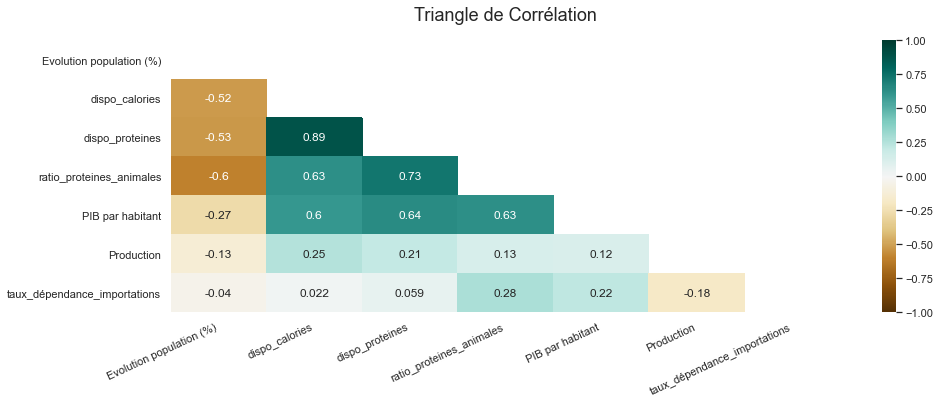

In [130]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_bilans_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_bilans_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('Triangle de Corr√©lation',  fontsize=18, pad=20)

plt.show()

# Observations
D'apr√®s le tableau de corr√©lation color√© ci-dessus, on peut constater une corr√©lation positive tr√®s forte entre la disponibilit√© alimentaire en prot√©ine par personnes et celle en kcal par personne .

On peut aussi  constater une corr√©lation positive  forte entre la pourcentage de prot√©ine d'origine animale et celle en kcal  et prot√©ines par personne .

Dans une moindre mesure, on retrouve √©galement une corr√©lation n√©gative entre le pourcentage d'√©volution de la population et les diff√©rents r√©gimes alimentaires des pays (prot√©ines, kcal, pourcentage de prot√©ine d'origine animale).



# Clustering

## Classification des pays via Clustering Hi√©rarchique Ascendant (CHA)

La premi√®re classification sera √©tablie sur la base des variables suivantes :

**La diff√©rence de population entre l'ann√©e 2013 et l'ann√©e 2019, exprim√©e en pourcentage;\
La proportion de prot√©ines d'origine animale par rapport √† la quantit√© totale de prot√©ines dans la disponibilit√© alimentaire du pays;\
La disponibilit√© alimentaire en grammes de prot√©ines par habitant ;\
La disponibilit√© alimentaire en Kcal par habitant.**

L'√©chantillon comporte peu de variables sur la dimension dite du "R√©gime alimentaire", il comporte √©galement un nombre de pays "ma√Ætrisables" qui permet de commencer par une classification hi√©rarchique. Algorithme qui a une forte complexit√© algorithmique en temps et en espace, le clustering hi√©rarchique est recommand√© pour les petits √©chantillons.


# Premier clustering

Le partitionnement ou clustering a pour objectif de cr√©er des groupes d‚Äôobservations homog√®nes.

Au pr√©alable, il est n√©cessaire de centrer-r√©duire les donn√©es. C‚Äôest √† dire, recalculer chaque valeur de mani√®re √† ce que la moyenne de la variable soit √©gale √† 0 et la variance et l‚Äô√©cart-type √©galent 1. Pour une variable donn√©e, on soustrait √† chaque valeur la moyenne de la variable, puis on divise le tout par l‚Äô√©cart-type.

Ensuite, nous pouvons proc√©der √† la classification ascendante hi√©rarchique selon la m√©thode de Ward. **L‚Äôobjectif est de regrouper des pays similaires.**

In [131]:
# dans array numpy
X = df_bilans_clus.values 
pays = df_bilans_clus.index
#nous allons extraire les donn√©es d'expression de 175 pays  dans un tableau de donn√©es num√©riques .
 #X comporte uniquement les donn√©es  , il ne contient pas les √©tiquettes des √©chantillons.
 #Conservons les √©tiquettes de chaque √©chantillon  dans la variable pays.
print('X', X.shape)
print('pays', pays.shape, pays.unique())


X (173, 7)
pays (173,) Index(['Arm√©nie', 'Afghanistan', 'Albanie', 'Alg√©rie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche', 'Bahamas',
       ...
       '√âthiopie', 'Samoa', 'Y√©men', 'R√©publique d√©mocratique du Congo',
       'Zambie', 'Belgique', 'Luxembourg', 'Serbie', 'Mont√©n√©gro', 'Soudan'],
      dtype='object', name='Zone', length=173)


In [132]:

# Centrage et R√©duction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
#Standardisez les caract√©ristiques en supprimant la moyenne et en mettant √† l'√©chelle la variance unitaire.
#Le score standard d'un √©chantillon x est calcul√© comme suit¬†:
#z = (x - u) / s o√π
# u est la moyenne des √©chantillons d'apprentissage ou z√©ro si with_mean=False, 
# s est l'√©cart type des √©chantillons d'apprentissage ou un si with_std=False.

X_cr = std_scale.fit_transform(X)
#Appelez X on self en produisant un DataFrame avec la m√™me forme d'axe que self.
print('X_cr', X_cr.shape)
X_cr

X_cr (173, 7)


array([[-0.83273961,  0.30060862,  0.60867002, ..., -0.47559083,
        -0.27898747,  0.68268766],
       [ 1.29655234, -1.35291108, -1.16145453, ..., -0.68455688,
        -0.27287592,  0.43366837],
       [-1.21843895,  0.99822174,  1.64882163, ..., -0.44135044,
        -0.27898747,  0.4144446 ],
       ...,
       [-1.3337178 , -0.0459903 ,  0.23961485, ..., -0.3378867 ,
        -0.24384605, -0.57141327],
       [-1.07703381,  1.40001157,  1.4559173 , ..., -0.26411904,
        -0.28204325,  0.51982581],
       [ 0.97307127, -0.67295905, -0.27304156, ..., -0.66718968,
        -0.25492324, -0.87354786]])

In [133]:

X_cr = pd.DataFrame(X_cr, index =df_bilans_clus.index, columns=df_bilans_clus.columns)
print('X_cr', X_cr.shape)
X_cr

X_cr (173, 7)


Evolution population (%)  dispo_calories  dispo_proteines  \
Zone                                                                     
Arm√©nie                     -0.832740        0.300609         0.608670   
Afghanistan                  1.296552       -1.352911        -1.161455   
Albanie                     -1.218439        0.998222         1.648822   
Alg√©rie                      0.622387        1.340405         0.443529   
Angola                       1.895033       -0.973198        -1.411321   
...                               ...             ...              ...   
Belgique                    -0.647028        2.018150         0.898266   
Luxembourg                   0.703863        1.364689         1.310401   
Serbie                      -1.333718       -0.045990         0.239615   
Mont√©n√©gro                  -1.077034        1.400012         1.455917   
Soudan                       0.973071       -0.672959        -0.273042   

             ratio_proteines_animales  PIB par habitant  Production  \
Zone                                                                  
Arm√©nie                      0.835739         -0.475591   -0.278987   
Afghanistan                 -1.528894         -0.684557   -0.272876   
Albanie                      0.697850         -0.441350   -0.278987   
Alg√©rie                     -1.001658         -0.508159   -0.172417   
Angola                      -0.795540         -0.573808   -0.264855   
...                               ...               ...         ...   
Belgique                     1.104052          1.616457   -0.112448   
Luxembourg                   1.148087          5.102695   -0.283571   
Serbie                       0.494718         -0.337887   -0.243846   
Mont√©n√©gro                   1.096029         -0.264119   -0.282043   
Soudan                      -1.018077         -0.667190   -0.254923   

             taux_d√©pendance_importations  
Zone                                       
Arm√©nie                          0.682688  
Afghanistan                      0.433668  
Albanie                          0.414445  
Alg√©rie                         -0.873548  
Angola                           0.818710  
...                                   ...  
Belgique                         2.532713  
Luxembourg                       1.116986  
Serbie                          -0.571413  
Mont√©n√©gro                       0.519826  
Soudan                          -0.873548  

[173 rows x 7 columns]

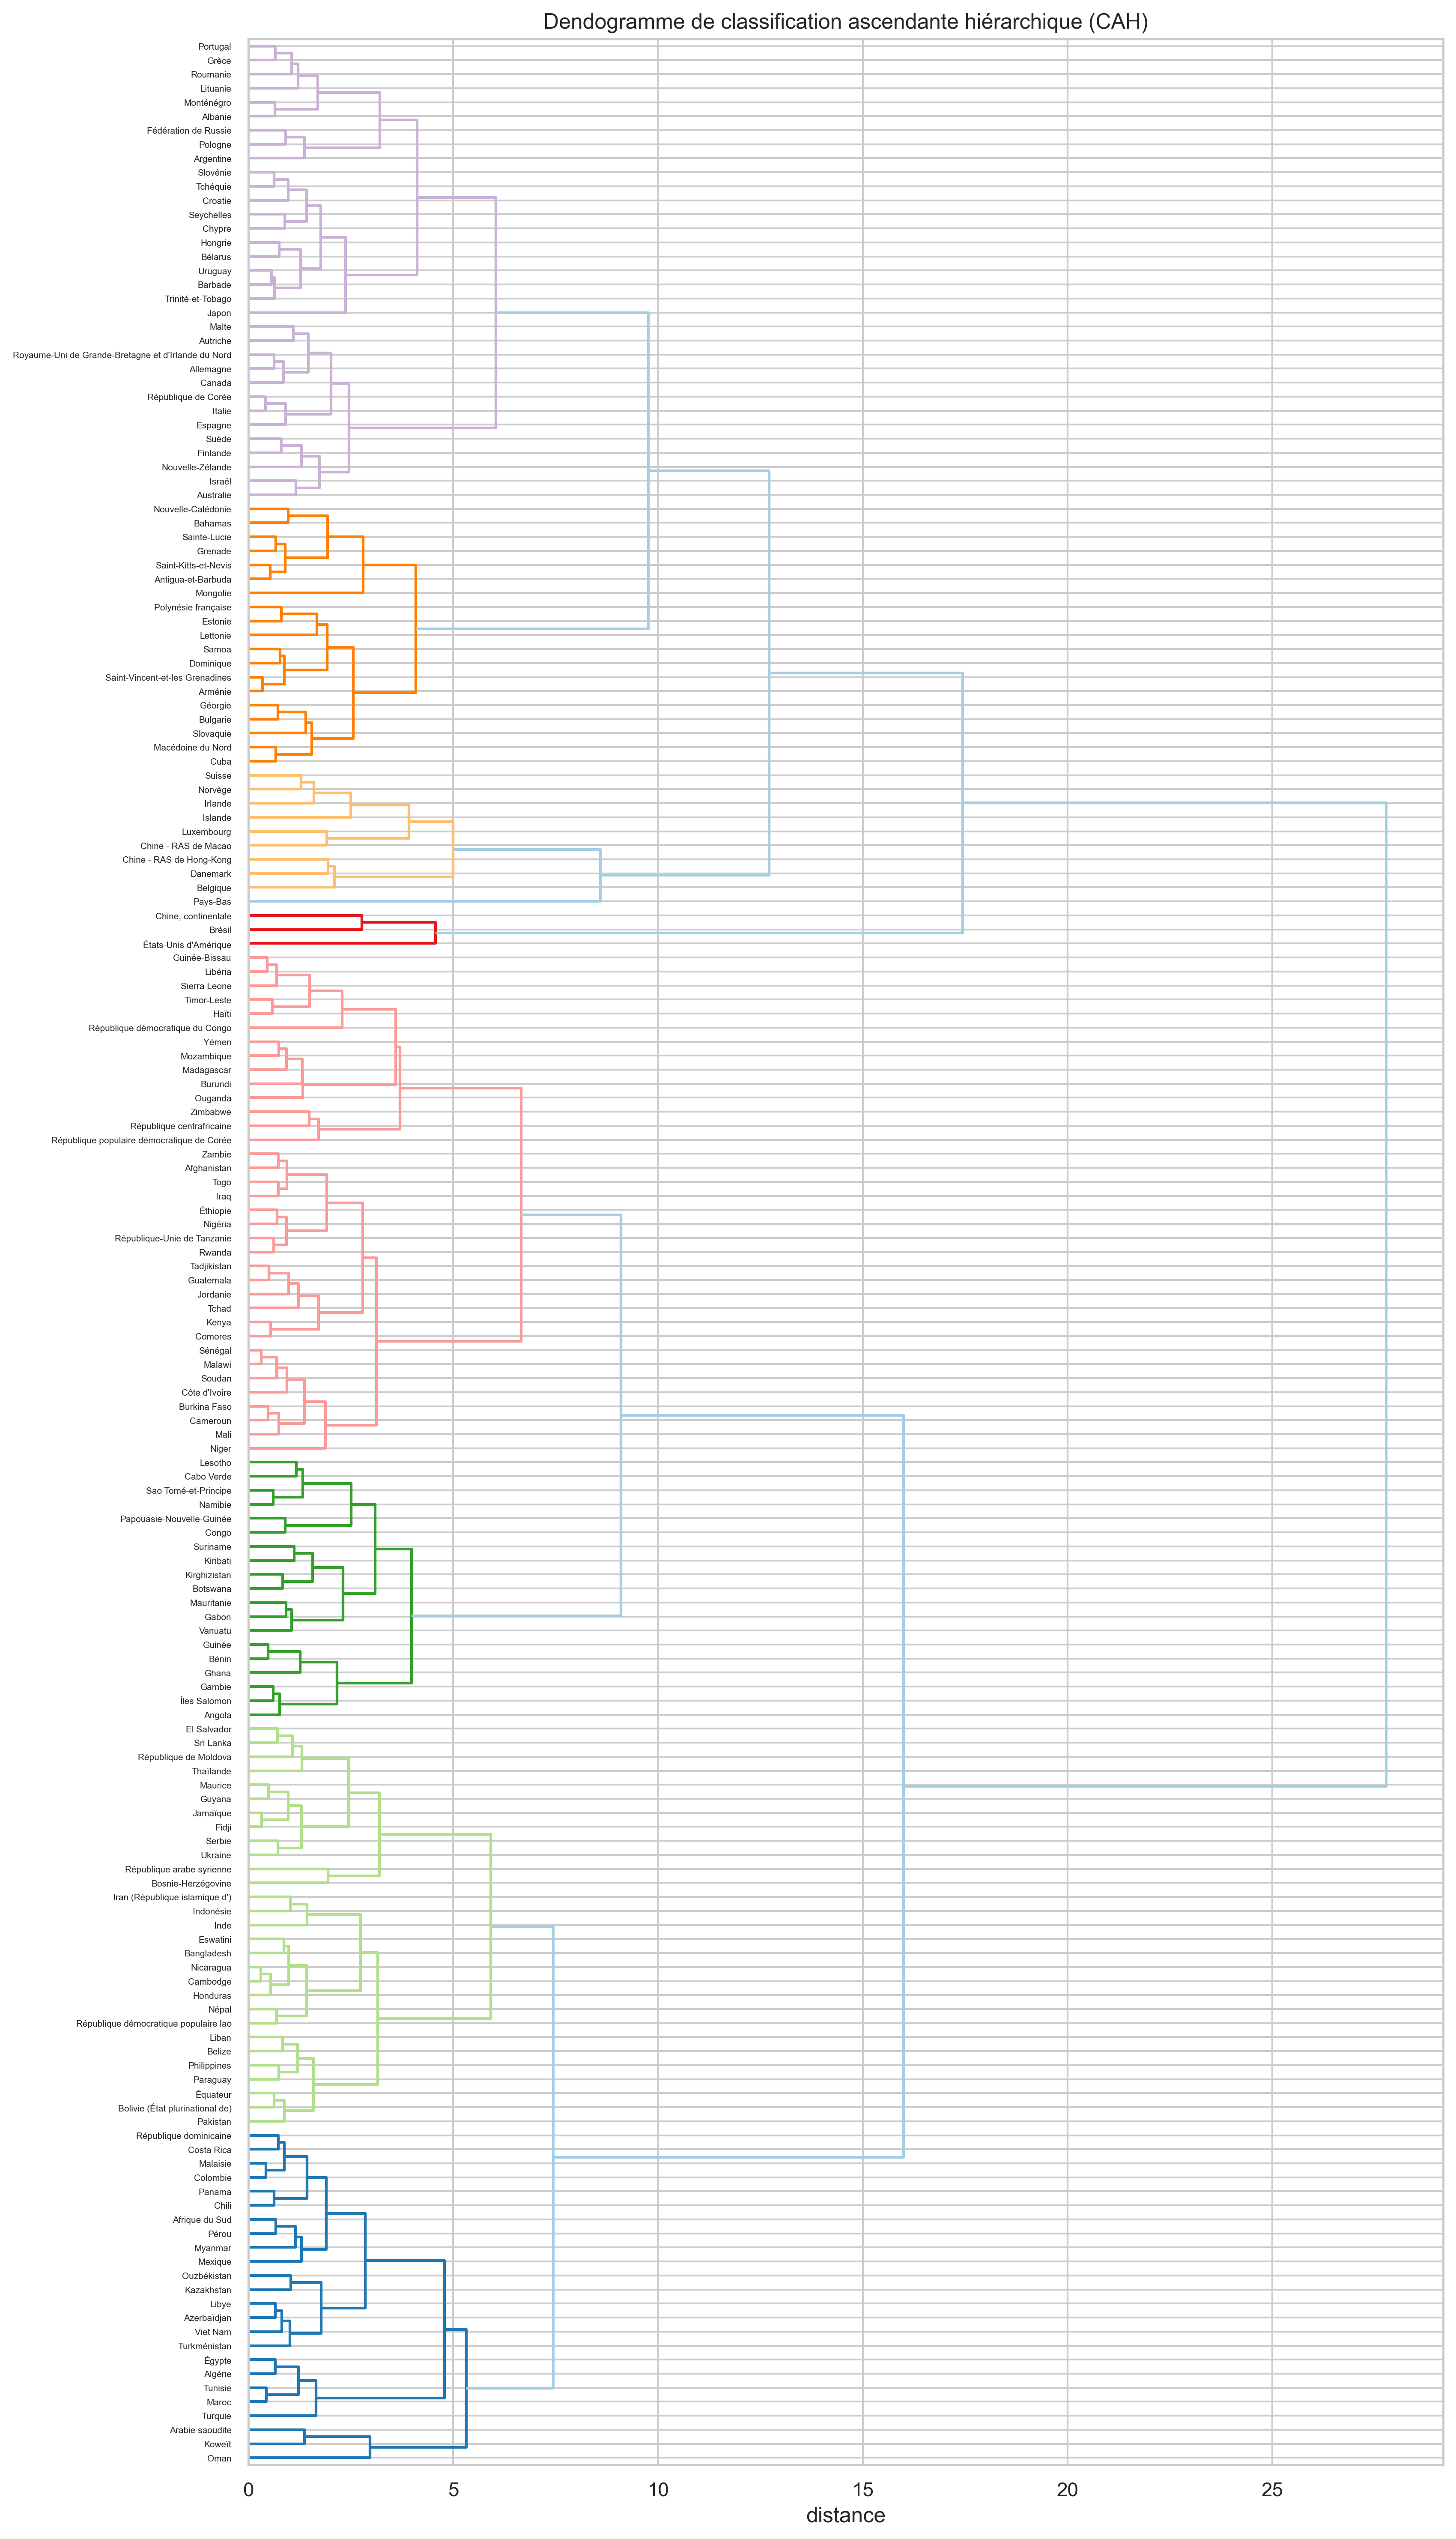

In [134]:
# Clustering hi√©rarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
z=linkage(X_cr, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),#Regroupement hi√©rarchique encod√© avec la matrice renvoy√©e par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

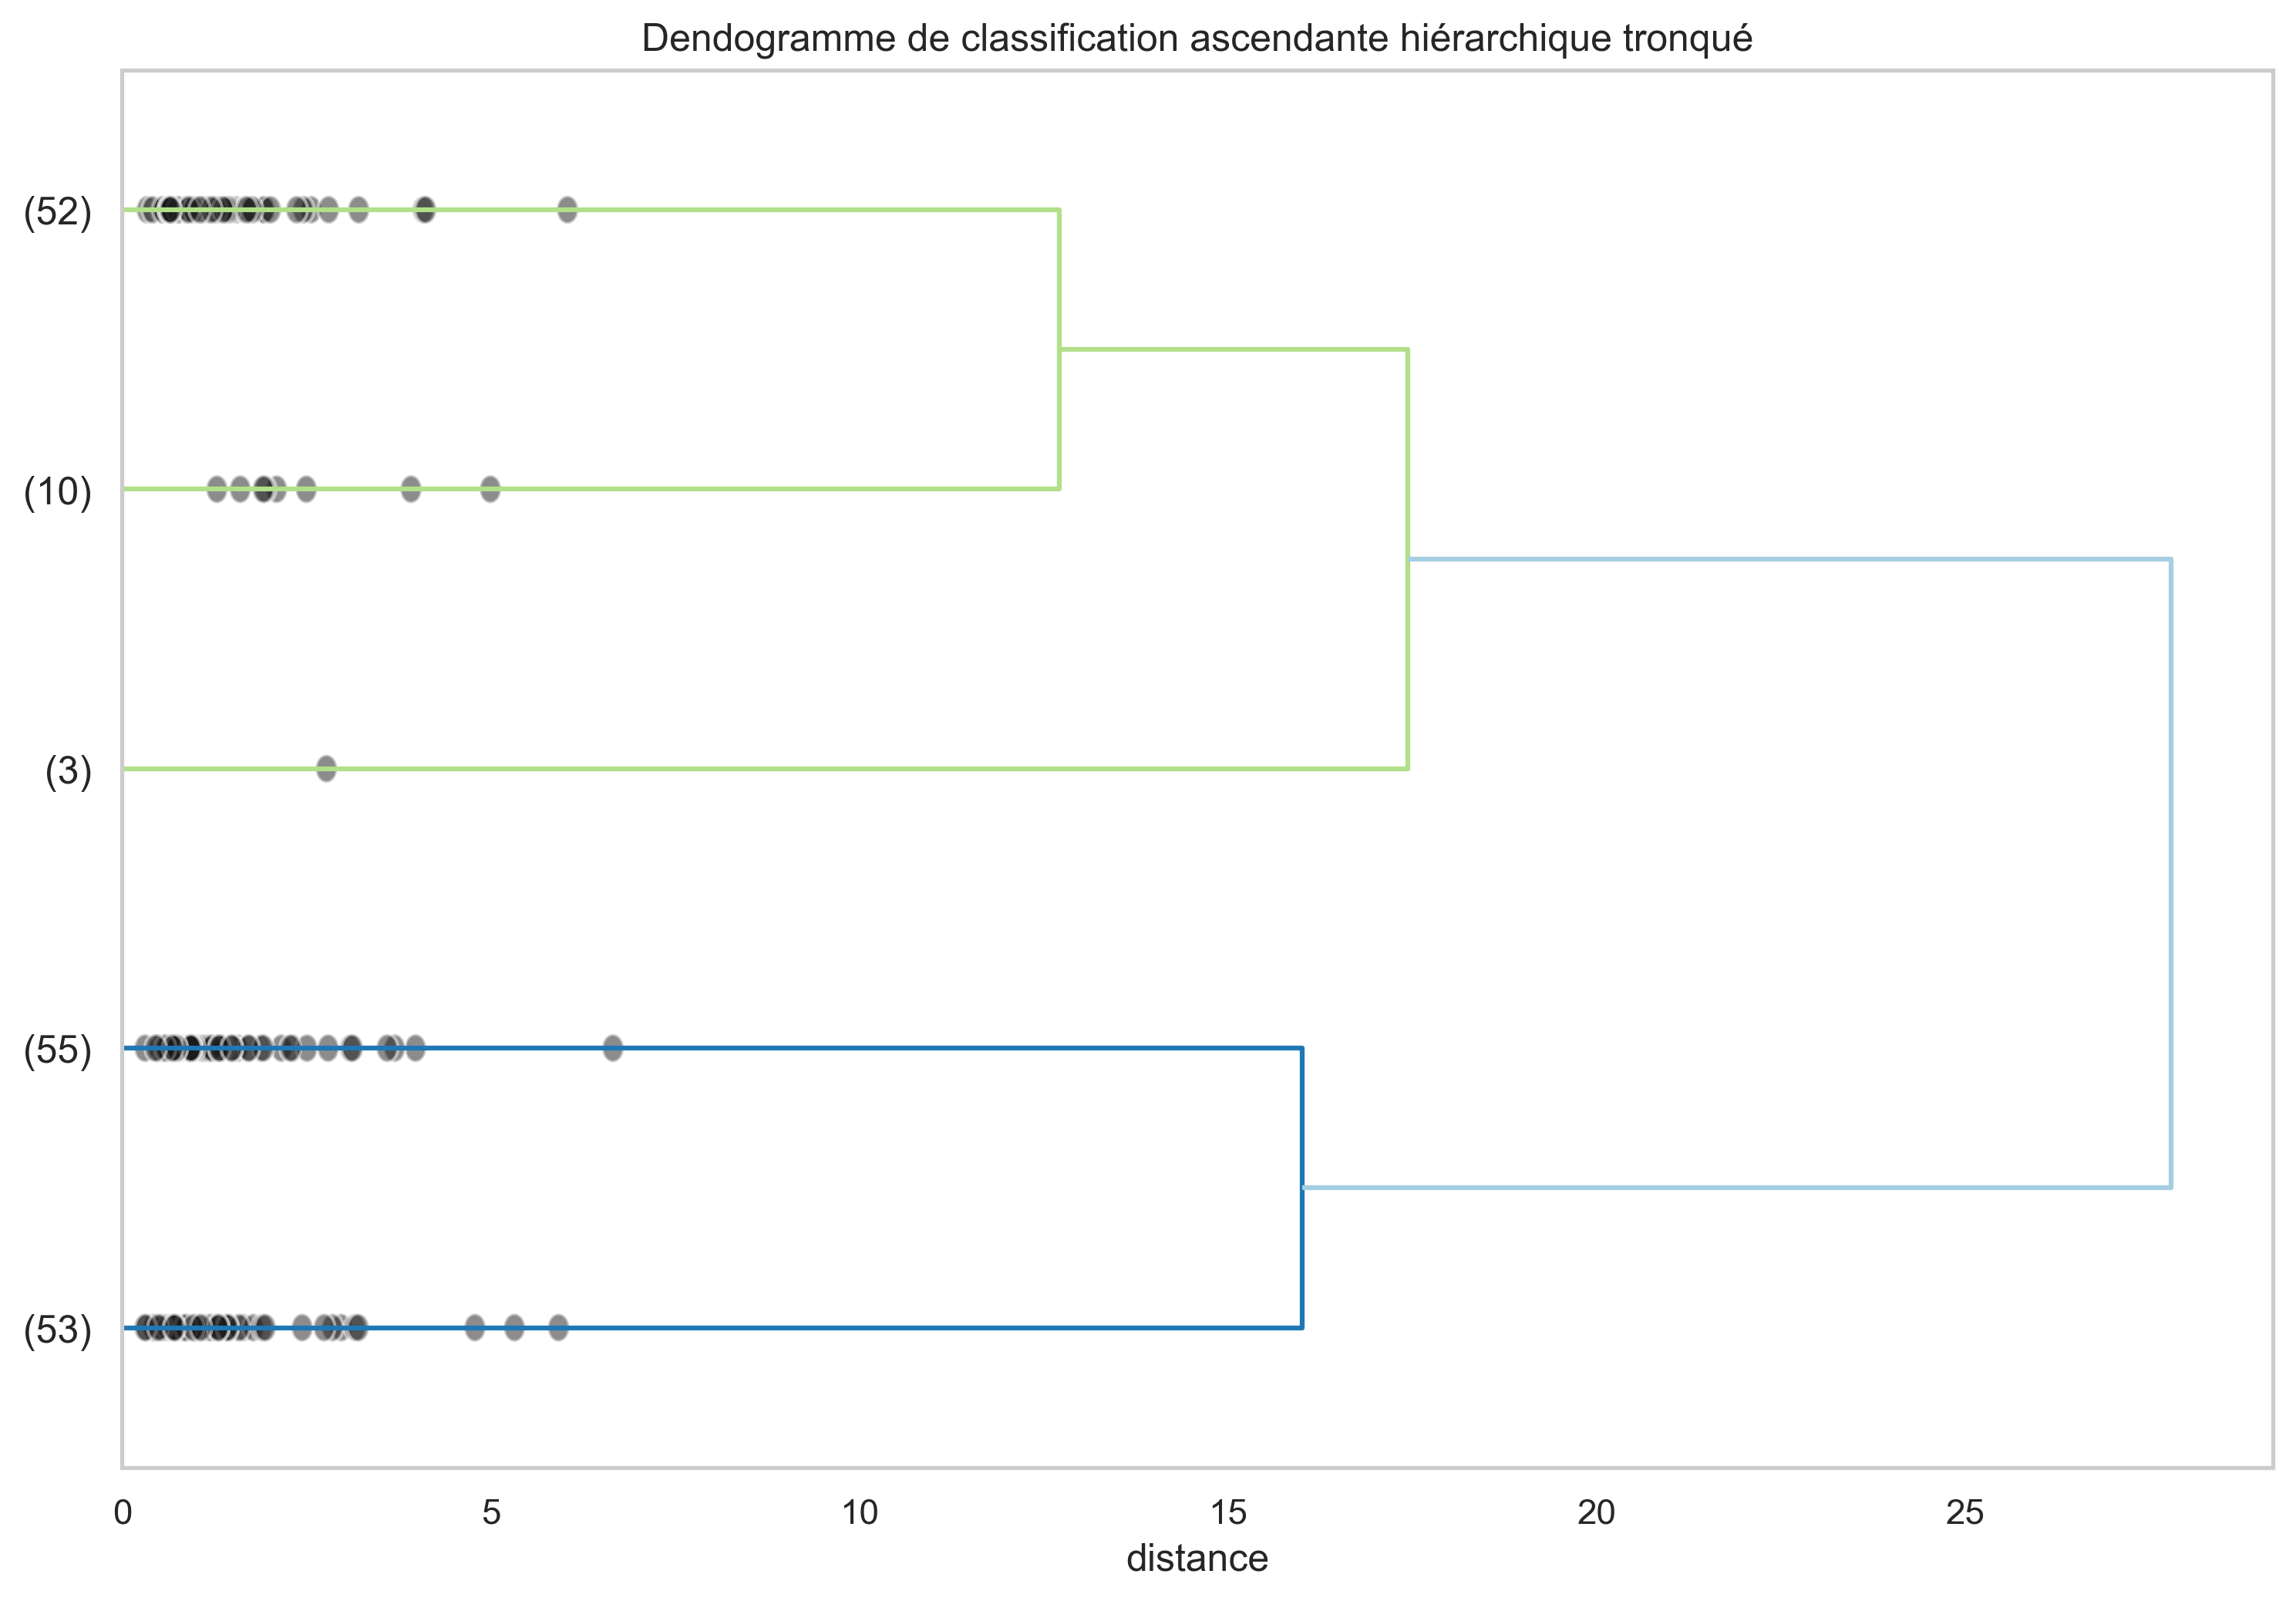

In [135]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hi√©rarchique tronqu√©')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton form√©s dans la liaison sont les seuls n≈ìuds non feuilles dans la liaison¬†; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



-> Il appara√Æt donc 5 groupes de pays, 


# Attribution des 5 groupes et World map de r√©partition

In [136]:

# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(linkage(X_cr, method='ward' ,metric='euclidean'), 5, criterion='maxclust')
#criterion , Crit√®re √† utiliser pour former des clusters plats. 
#maxclust : Trouve un seuil minimum r pour que la distance coph√©n√©tique entre deux observations originales quelconques dans le m√™me cluster plat ne soit pas sup√©rieure √† r et que pas plus de t clusters plats soient form√©s.
clusters_cah


array([5, 2, 5, 1, 2, 5, 5, 5, 5, 5, 5, 1, 1, 2, 3, 1, 2, 5, 1, 2, 2, 5,
       2, 2, 1, 2, 1, 3, 1, 2, 2, 1, 5, 5, 1, 2, 4, 5, 1, 5, 1, 1, 1, 5,
       1, 5, 5, 5, 2, 2, 5, 1, 2, 2, 5, 5, 2, 2, 1, 2, 1, 4, 5, 5, 4, 1,
       1, 1, 2, 4, 5, 5, 2, 1, 1, 5, 2, 2, 2, 1, 2, 5, 1, 5, 1, 1, 2, 2,
       1, 5, 4, 2, 2, 1, 2, 5, 2, 1, 1, 5, 1, 2, 1, 2, 1, 4, 5, 5, 2, 5,
       1, 2, 2, 4, 1, 1, 5, 2, 1, 1, 1, 5, 5, 2, 2, 2, 5, 2, 5, 5, 5, 5,
       2, 1, 2, 5, 2, 5, 5, 1, 5, 2, 2, 1, 5, 4, 1, 1, 2, 1, 2, 5, 1, 1,
       1, 2, 5, 1, 3, 2, 5, 1, 1, 2, 5, 2, 2, 2, 4, 4, 1, 5, 2],
      dtype=int32)

In [137]:
#index tri√©s des groupes
idg = np.argsort(clusters_cah)
#Renvoie les indices qui trieraient un tableau.
idg

array([ 40,  38,  84,  41,  42,  44, 120, 119, 118, 115,  51, 114, 110,
       104, 133,  58, 102, 100,  98,  65,  66,  67,  97,  93,  73,  74,
        88,  85,  79,  60,  34,  82, 147, 157, 154,  15, 153,  31, 152,
       161, 162,  18, 149,  11, 146,  12,  24, 170, 139, 143,  26,   3,
        28, 159, 167,  87,  91, 166,  96,  94, 163, 165,  92, 136, 108,
       155, 134, 141, 132, 127, 125, 142, 101, 124, 148, 117, 150, 112,
       111, 103, 123,  86, 172,  59,  16,  48,  49,  13,  22,  52,  53,
        23,  30,  56,  25,  57,  20,  35,  19,  68,  80,  78,   1,  29,
        77,   4,  76,  72,  14, 158,  27,  64,  90, 113, 169, 105,  69,
        61,  36, 145, 168, 140, 144,  21,  83,  17, 156,  10,   9, 160,
         8,   7,   6, 164,   5,   2, 151, 138,  37,  32, 171,  89,  75,
        71,  70,  95,  99,  63,  62, 106, 107, 109,  55,  54,  50, 116,
        47, 135,  33, 131, 130, 129, 128, 137,  81,  39,  43,  45, 122,
       121,  46, 126,   0])

In [138]:

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","Zone"])
df_groupage_1["Zone"] = df_bilans_clus.index[idg]
df_groupage_1["groupe_cah"] = clusters_cah[idg]
df_groupage_1.head()

groupe_cah                                   Zone
0           1                               √âquateur
1           1                 R√©publique dominicaine
2           1  R√©publique d√©mocratique populaire lao
3           1                                 √âgypte
4           1                            El Salvador

In [139]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_bilans_clus, df_groupage_1, on="Zone")
df_groupes_cah.to_csv('exports/df_groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

Zone  Evolution population (%)  \
9                            Bahamas                     6.077   
137                         Slov√©nie                     0.753   
131  Saint-Vincent-et-les Grenadines                     1.811   
105                         Pays-Bas                     1.506   
1                        Afghanistan                    17.887   

     dispo_calories  dispo_proteines  ratio_proteines_animales  \
9          958490.0         27776.50                    63.640   
137       1149385.0         34799.10                    54.521   
131       1076385.0         33382.90                    56.932   
105       1223845.0         39460.15                    64.351   
1          829645.0         20918.15                    18.042   

     PIB par habitant  Production  taux_d√©pendance_importations  groupe_cah  
9        34863.742098         6.0                    113.636364           5  
137      26062.166820        70.0                     46.000000           5  
131       7463.537831         0.0                     88.888889           5  
105      53052.814311      1036.0                    404.026846           4  
1          469.919090        28.0                     65.671642           2

In [140]:
#Premi√®re comparaison des moyennes afin d'identifier le groupe de pays le plus porteur √† ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

Evolution population (%)  dispo_calories  dispo_proteines  \
groupe_cah                                                              
1                           7.509415    1.073775e+06     29571.335849   
2                          15.692127    8.846472e+05     22233.410909   
3                           3.998000    1.272025e+06     38217.933333   
4                           5.789400    1.273923e+06     41535.905000   
5                           1.883404    1.155864e+06     35209.023077   

            ratio_proteines_animales  PIB par habitant    Production  \
groupe_cah                                                             
1                          39.970849       6535.640131    759.867925   
2                          26.838545       1857.123607     46.981818   
3                          54.558000      27964.185954  19145.666667   
4                          63.965200      72176.739277    203.400000   
5                          57.231212      22704.803840    502.019231   

            taux_d√©pendance_importations  
groupe_cah                                
1                              14.707837  
2                              50.122175  
3                               1.554247  
4                             121.352251  
5                              54.571212

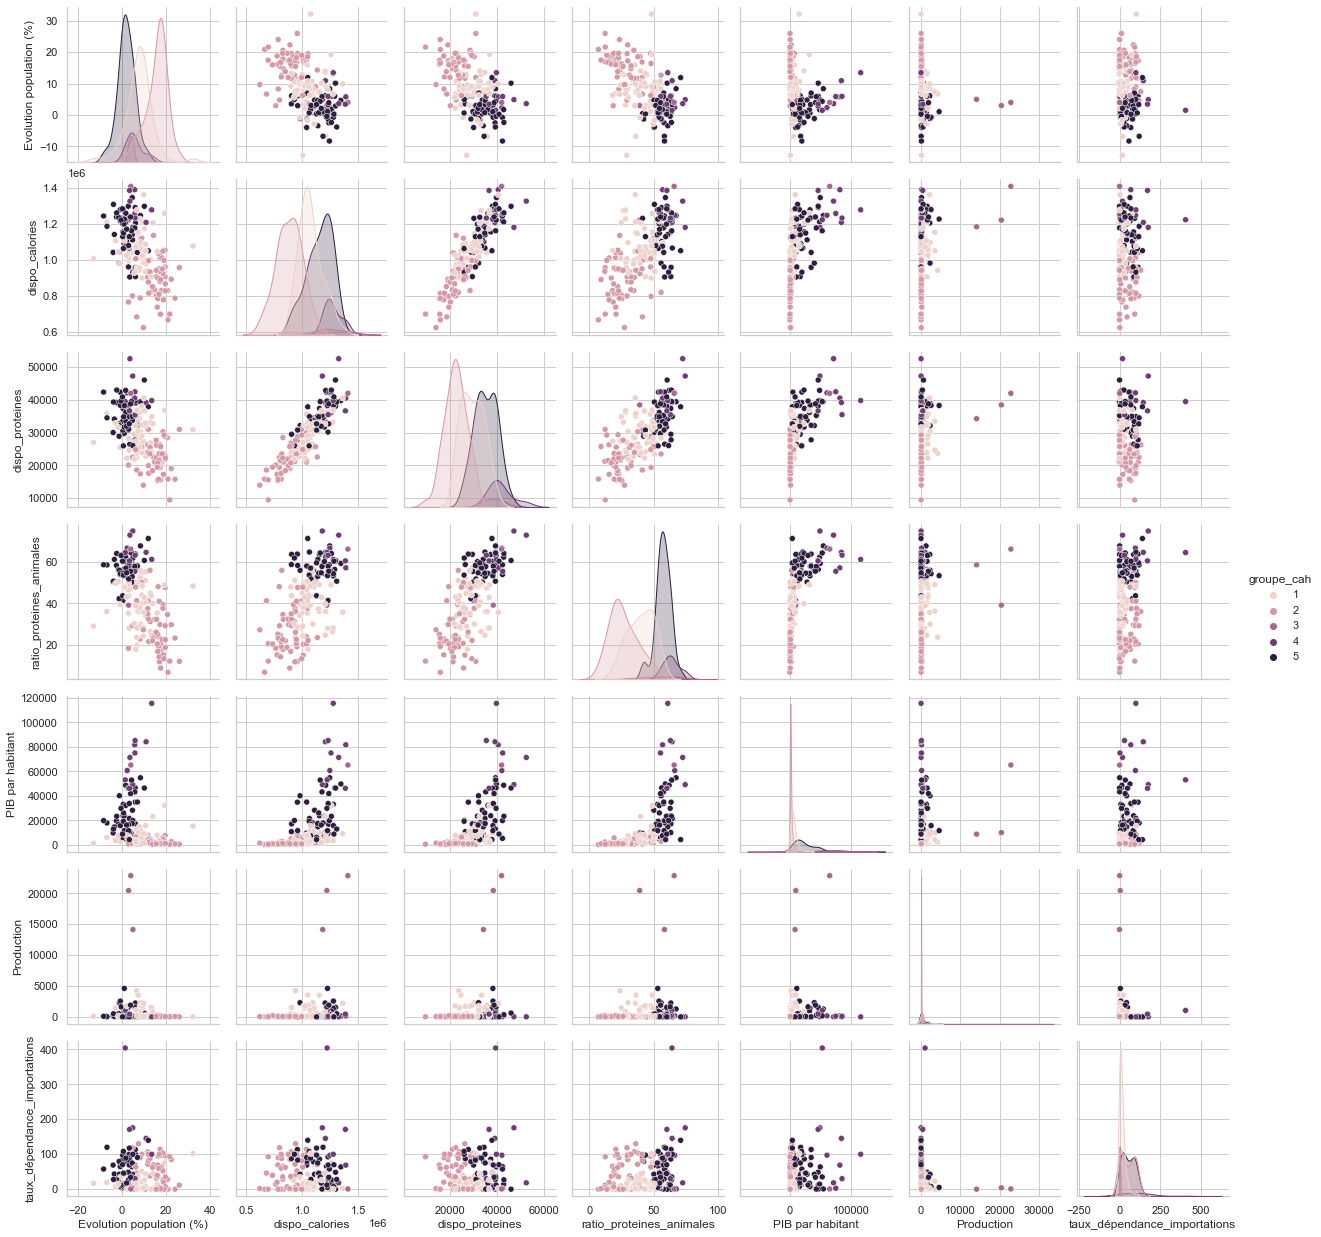

In [141]:
# Pairplot avec coloration des groupes
sns.pairplot(df_groupes_cah[["Evolution population (%)", "dispo_calories",
                                   "dispo_proteines","ratio_proteines_animales", "groupe_cah",'PIB par habitant','Production','taux_d√©pendance_importations']], hue="groupe_cah")


In [142]:
#Premi√®re comparaison des moyennes afin d'identifier le groupe de pays le plus porteur √† ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()




Evolution population (%)  dispo_calories  dispo_proteines  \
groupe_cah                                                              
1                           7.509415    1.073775e+06     29571.335849   
2                          15.692127    8.846472e+05     22233.410909   
3                           3.998000    1.272025e+06     38217.933333   
4                           5.789400    1.273923e+06     41535.905000   
5                           1.883404    1.155864e+06     35209.023077   

            ratio_proteines_animales  PIB par habitant    Production  \
groupe_cah                                                             
1                          39.970849       6535.640131    759.867925   
2                          26.838545       1857.123607     46.981818   
3                          54.558000      27964.185954  19145.666667   
4                          63.965200      72176.739277    203.400000   
5                          57.231212      22704.803840    502.019231   

            taux_d√©pendance_importations  
groupe_cah                                
1                              14.707837  
2                              50.122175  
3                               1.554247  
4                             121.352251  
5                              54.571212

In [143]:
#Pr√©paration de sous-ensembles permettant de caract√©riser les groupes un √† un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]

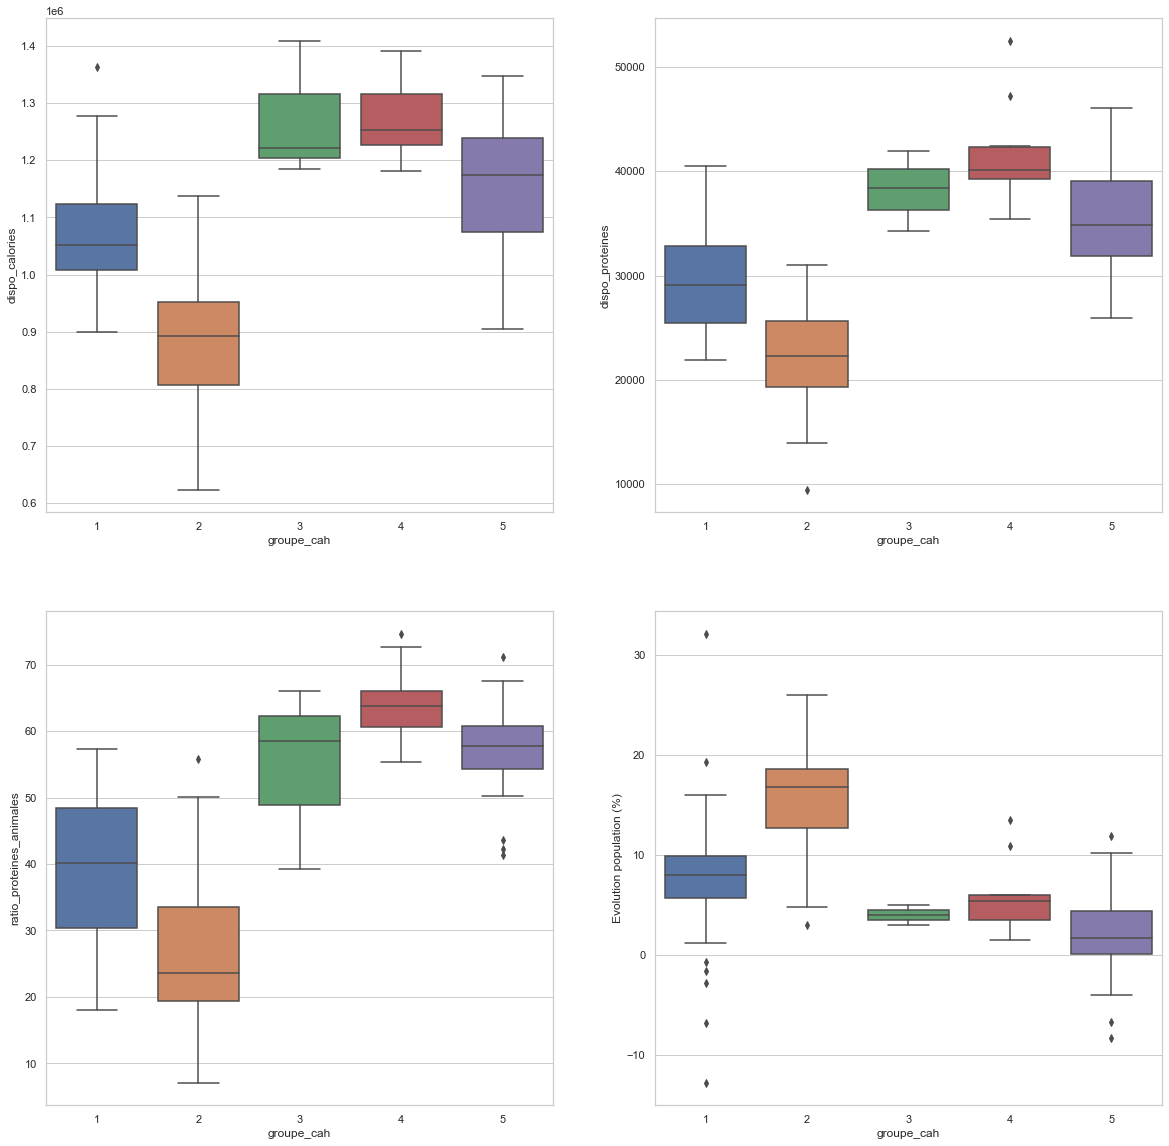

In [144]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Evolution population (%)')



plt.savefig("exports/boxplot_dendogramme1.png")

plt.show(block=False)

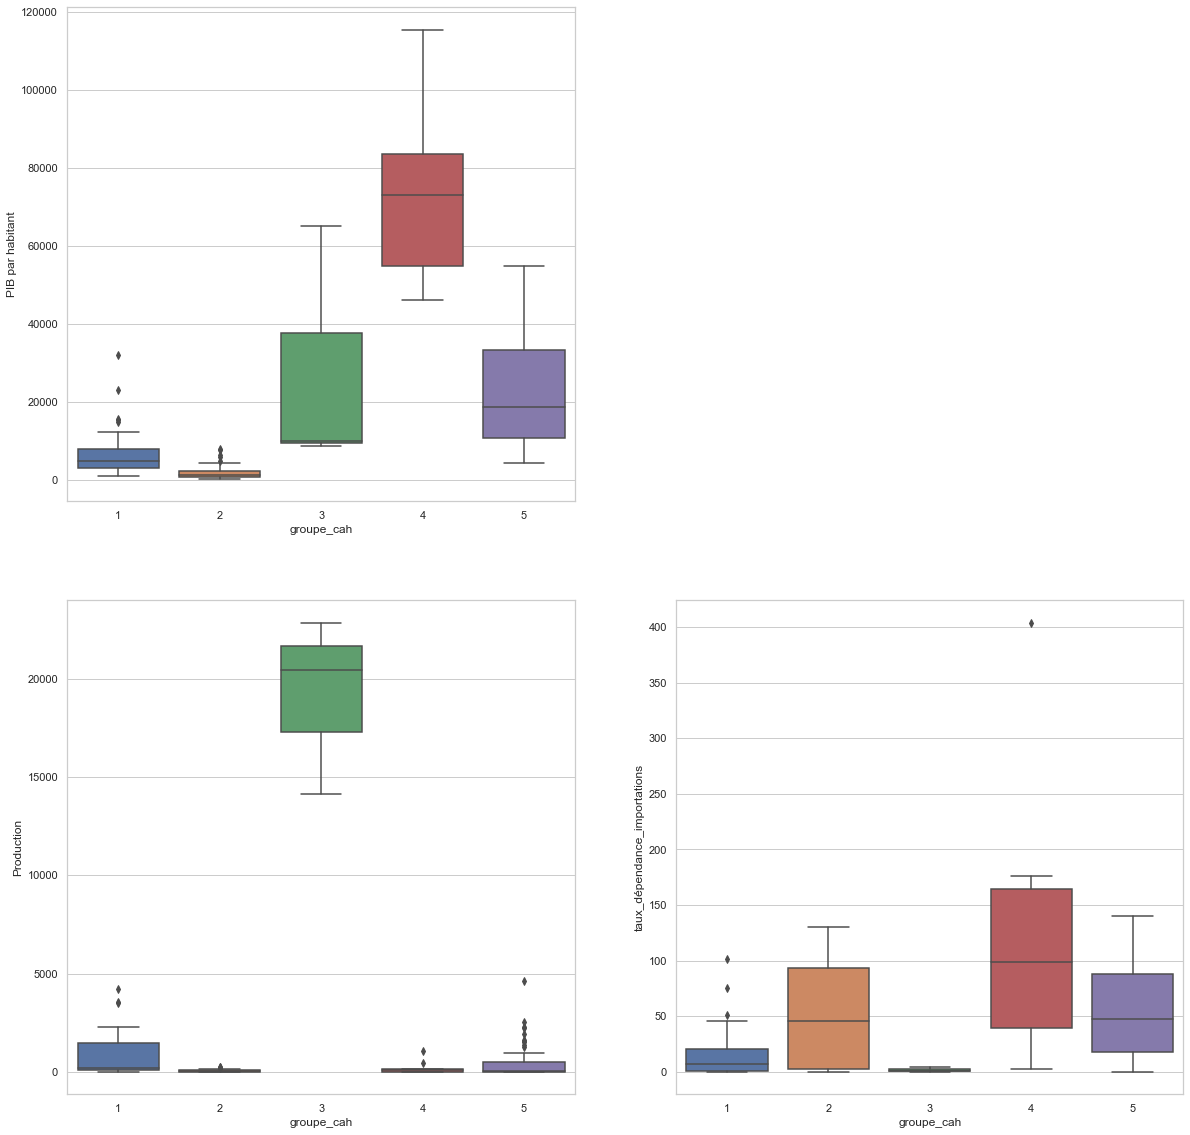

In [145]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB par habitant')



plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Production')


plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_d√©pendance_importations')



plt.savefig("exports/boxplot_dendogramme.png")

plt.show(block=False)

In [146]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([4,5]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah

Zone  Evolution population (%)  dispo_calories  \
0               Arm√©nie                     2.076       1103030.0   
2               Albanie                    -0.788       1218370.0   
5    Antigua-et-Barbuda                     6.121        907025.0   
6             Argentine                     6.125       1205960.0   
7             Australie                     8.378       1247205.0   
..                  ...                       ...             ...   
160             Uruguay                     2.133       1171285.0   
164               Samoa                     3.345       1129675.0   
168            Belgique                     3.455       1387000.0   
169          Luxembourg                    13.486       1278960.0   
171          Mont√©n√©gro                     0.262       1284800.0   

     dispo_proteines  ratio_proteines_animales  PIB par habitant  Production  \
0           34415.85                    56.061       4622.733216        12.0   
2           42347.30                    53.844       5303.197823        12.0   
5           29492.00                    63.515      17112.821135         0.0   
6           39036.75                    63.478      10041.463303      2248.0   
7           39398.10                    67.547      54763.202388      1278.0   
..               ...                       ...               ...         ...   
160         31941.15                    54.668      16190.138438        31.0   
164         32663.85                    59.426       4285.485317         0.0   
168         36624.10                    60.375      46198.310321       448.0   
169         39766.75                    61.083     115480.867570         0.0   
171         40876.35                    60.246       8825.344514         4.0   

     taux_d√©pendance_importations  groupe_cah  
0                       78.181818           5  
2                       64.705882           5  
5                      100.000000           5  
6                        0.247525           5  
7                        0.724055           5  
..                            ...         ...  
160                     17.647059           5  
164                    117.647059           5  
168                    171.122995           4  
169                    100.000000           4  
171                     70.000000           5  

[62 rows x 9 columns]

In [147]:
#Pays du groupe 1 et 2 identifi√©s comme potentiellement int√©ressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')



groupe 1
----------
['Alg√©rie' 'Bangladesh' 'Bolivie (√âtat plurinational de)' 'Belize'
 'Myanmar' 'Sri Lanka' 'Chili' 'Colombie' 'Costa Rica' 'Azerba√Ødjan'
 'R√©publique dominicaine' '√âquateur' '√âgypte' 'El Salvador' 'Fidji'
 'Bosnie-Herz√©govine' 'Guyana' 'Honduras' 'Inde' 'Indon√©sie'
 "Iran (R√©publique islamique d')" 'Kazakhstan' 'Jama√Øque' 'Cambodge'
 'Kowe√Øt' 'R√©publique d√©mocratique populaire lao' 'Liban' 'Libye'
 'Malaisie' 'Maurice' 'Mexique' 'Maroc' 'R√©publique de Moldova' 'N√©pal'
 'Nicaragua' 'Pakistan' 'Panama' 'Paraguay' 'P√©rou' 'Philippines'
 'Arabie saoudite' 'Afrique du Sud' 'Eswatini' 'R√©publique arabe syrienne'
 'Turkm√©nistan' 'Tha√Ølande' 'Oman' 'Tunisie' 'Turquie' 'Ukraine'
 'Ouzb√©kistan' 'Viet Nam' 'Serbie']
------------------------------------------------------------
------------------------------------------------------------
groupe 2
----------
['Afghanistan' 'Angola' 'Botswana' '√éles Salomon' 'Burundi' 'Cameroun'
 'Cabo Verde' 'R√©publique centr

Les clusters 1 et 2, situ√©s majoritairement en Afrique, sont ceux qui ont les d√©mographies les plus fortes et les PIB/habitants les plus faibles.

Les cluster 4 et 5 refl√®tent au contraire des pays en moyenne plus riches comme les USA ou la plupart des pays europ√©ens.

Le cluster 3 est dans une position interm√©diaire.

Concernant les disponibilit√©s alimentaires, celles-ci suivent les m√™me tendances que le PIB. Les pays les plus pauvres ont un moindre acc√®s √† l‚Äôalimentation. Cela fait √©cho aux probl√®me de sous-nutrition mis en √©vidence lors du projet 3.

La consommation de prot√©ines animales confirme le partitionnement, avec une forte alimentation carn√©e de la part des clusters 5 et 3.

En revanche, les deux derni√®res variables √©voluent bien diff√©remment. Nous voyons que les clusters 4 et 5 sont ceux qui importent beaucoup plus de viandes de volailles qu‚Äôils n‚Äôen produisent.

Le groupe 3 est celui qui d√©pend le plus de l'importation.

Le groupe 4 est l'un des plus grands pays producteurs de poulet.


En conclusion pour cette premi√®re division, 64 pays deviendraient vraisemblablement une cible appropri√©e pour l'entreprise. La demande sera pr√©sente dans ces pays.
Appliquons une autre m√©thode, celle des K-Means, afin de pouvoir comparer cette premi√®re s√©lection...

# Application de l'algorithme du K-Means

Le clustering K-Means est une m√©thode de clustering simple mais puissante qui cr√©e ùëò segments distincts des donn√©es o√π la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer diff√©rentes valeurs de ùëò et calculer l'inertie, ou score de distorsion, pour chaque mod√®le. L'inertie mesure la similarit√© du cluster en calculant la distance totale entre les points de donn√©es et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance √† avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La m√©thode de coude nous aidera pour identifier les clusters.

Nous ex√©cutons l'analyse de cluster en utilisant le cluster de 1 √† 10.

De plus, nous stockons les scores WSS.

Le score WSS sera utilis√© pour cr√©er le Elbow Plot

WSS¬†= intra-cluster-somme du carr√©


WSS = Within-Cluster-Sum of Squared

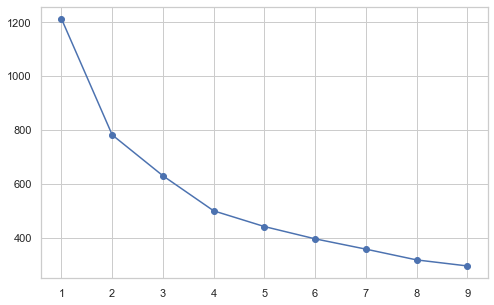

In [148]:
K=range(1,10)
k_means = []
#On fait une boucle de 2 √† 9 pour tester toutes ces possibili√©ts
for k in K:
    #pour chaque k, on cr√©e un mod√®le et on l‚Äôajuste
    kmeans=KMeans(n_clusters=k,init="k-means++").fit(X_cr)
     #on stocke l‚Äôinertie associ√©e
    k_means.append(kmeans.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [149]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

groupe_km          WSS
0          1  1211.000000
1          2   780.670827
2          3   629.162531
3          4   499.208349
4          5   440.925311
5          6   395.373490
6          7   357.208187
7          8   317.307526
8          9   294.890676

Id√©alement, pour optimiser et ne pas perdre trop d'information il serait indiquer de choisir un k = 2.

 Un clustering en 3, puis en 5 permettra √©galement de comparer le partitionnement avec les groupes de la classification hi√©rarchique. Il est pertinent de comparer les deux m√©thodes sur le m√™me nombre de clusters.

In [150]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_cr)
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_cr)
#R√©cup√©ration des clusters attribu√©s √† chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans5 = cls5.labels_



# Visualisation des clusters en ACP pour la projection des donn√©es


Le principe de **la r√©duction de dimension** est de r√©duire la complexit√© superflue d'un dataset en projetant ses donn√©es dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos donn√©es sur des axes appel√©s Composantes Principales, en cherchant √† minimiser la distance entre nos points et leur projections. De cette mani√®re on r√©duit la dimension pr√©servant au maximum la variance de nos donn√©es. Pour **Pr√©server un maximum de variance pour optenir la projection qu'il soit la plus fid√®le possible √† nos donn√©es.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire √ßa dans point de vue math√©matique on
 1. On calcule la matrice de covariance des donn√©es 
 2. On d√©termine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les donn√©es sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appr√©hender le "comportement" des diff√©rents groupes.**

PCA est un transformer ! 
1. D√©finir le nombre de composantes 
2. Transformer les donn√©es avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos donn√©es? et bien :
1. Celui dans lequel vous cherchez √† visualiser vos donn√©es dans un espace de 2d ou 3D ,pour √ßa c'est tr√®s simple, le nombre de composants doit √™tre √©gale √† deux ou trois
2. Celui dans lequel vous cherchez √† compresser vos donn√©es pour acc√©l√©rer l'apprentissage de la machine sur des taches de classification ou de r√©gression, pour √ßa il faut choisir le nombre de composantes de telle sorte √† pr√©server entre 95 et 99 % de la variance de vos donn√©es.

### D√©finir le nombre de composantes 

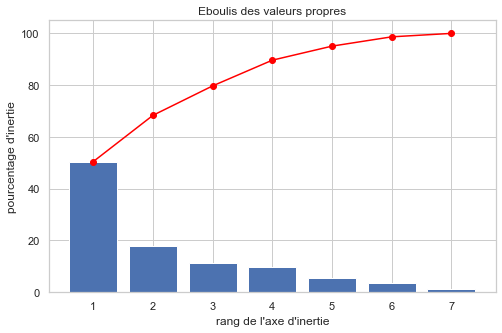

[ 50.48196116  68.35304621  79.72400704  89.65251374  95.07853945
  98.6710612  100.        ]


array([50.48196116, 17.87108505, 11.37096082,  9.92850671,  5.4260257 ,
        3.59252176,  1.3289388 ])

In [151]:
import pca as pca
from sklearn import decomposition
#Repr√©sentation de la variance expliqu√©e 
model_pca = decomposition.PCA()
model_pca.fit(X_cr)

#nous allons examiner quel est le pourcentage de variance pr√©server pour chacune de nos composantes.
scree = model_pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#Pourcentage de variance expliqu√©e par les composantes principales √† l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree

Environ 70 % de la variance des donn√©es s'explique par ces deux premi√®res composantes.

La m√©thode du coude pr√©cise une forte repr√©sentation de nos variables sur les deux premi√®res composantes principales, le premier axe factoriel.

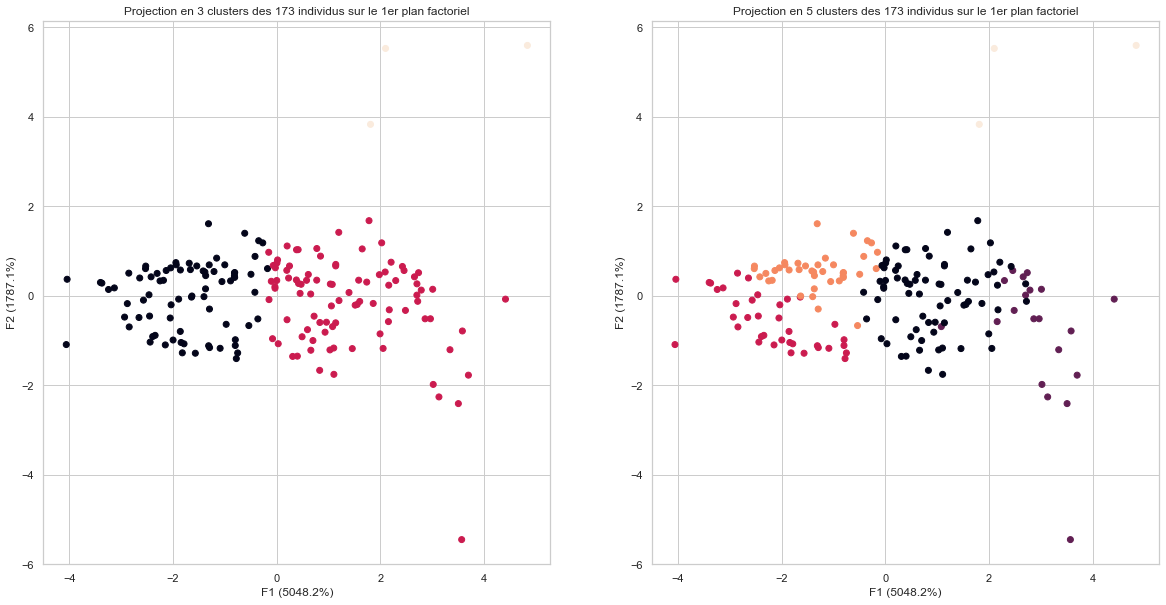

In [152]:
#Coordonn√©es factorielles 
X_projected = model_pca.transform(X_cr)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls3.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans5)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

La projection en 3 clusters est possible, mais l'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifi√©s lors du pr√©c√©dent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est n√©cessaire de caract√©riser chacun de ces groupes selon nos 8 variables. La position des centro√Ødes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de proc√©der en K-Means, afin d'obtenir directement des valeurs centr√©es et r√©duites, facilitant l'analyse. ‚¨áÔ∏è

In [153]:
#Tableau des Centro√Ødes 5 clusters dans sa version centr√©e r√©duite
#La comparaison est tout de suite simplifi√©e, les dimensions prenant la m√™me importance!
centroids = cls5.cluster_centers_
pd.DataFrame(centroids, columns=df_bilans_clus.columns)

Evolution population (%)  dispo_calories  dispo_proteines  \
0                 -0.721717        0.434428         0.444178   
1                 -0.286949        1.288857         1.436986   
2                  1.101224       -1.220811        -1.163162   
3                  0.485018       -0.407215        -0.536239   
4                 -0.573901        1.322744         1.107285   

   ratio_proteines_animales  PIB par habitant  Production  \
0                  0.564611         -0.035170   -0.081832   
1                  1.179742          2.246965   -0.104655   
2                 -0.896432         -0.592649   -0.270935   
3                 -0.846757         -0.563516   -0.074928   
4                  0.742258          0.698931    7.029537   

   taux_d√©pendance_importations  
0                     -0.000330  
1                      0.685869  
2                      0.437198  
3                     -0.683545  
4                     -0.842610

In [154]:
#Index tri√© des clusters
idk = np.argsort(cls5.labels_)

#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_bilans_clus.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'groupe_km'})

In [155]:
#Int√©gration des clusters dans notre dataframe "df_cls5" par la m√©thode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_bilans_clus, df_cls5, on='Zone')
df_cls5

Zone  Evolution population (%)  dispo_calories  dispo_proteines  \
0        Arm√©nie                     2.076       1103030.0         34415.85   
1    Afghanistan                    17.887        829645.0         20918.15   
2        Albanie                    -0.788       1218370.0         42347.30   
3        Alg√©rie                    12.881       1274945.0         33156.60   
4         Angola                    22.331        892425.0         19012.85   
..           ...                       ...             ...              ...   
168     Belgique                     3.455       1387000.0         36624.10   
169   Luxembourg                    13.486       1278960.0         39766.75   
170       Serbie                    -1.644       1045725.0         31601.70   
171   Mont√©n√©gro                     0.262       1284800.0         40876.35   
172       Soudan                    15.485        942065.0         27692.55   

     ratio_proteines_animales  PIB par habitant  Production  \
0                      56.061       4622.733216        12.0   
1                      18.042        469.919090        28.0   
2                      53.844       5303.197823        12.0   
3                      26.519       3975.510381       291.0   
4                      29.833       2670.850732        49.0   
..                        ...               ...         ...   
168                    60.375      46198.310321       448.0   
169                    61.083     115480.867570         0.0   
170                    50.578       7359.348533       104.0   
171                    60.246       8825.344514         4.0   
172                    26.255        815.060101        75.0   

     taux_d√©pendance_importations  groupe_km  
0                       78.181818          0  
1                       65.671642          2  
2                       64.705882          0  
3                        0.000000          3  
4                       85.015291          2  
..                            ...        ...  
168                    171.122995          1  
169                    100.000000          1  
170                     15.178571          0  
171                     70.000000          0  
172                      0.000000          3  

[173 rows x 9 columns]

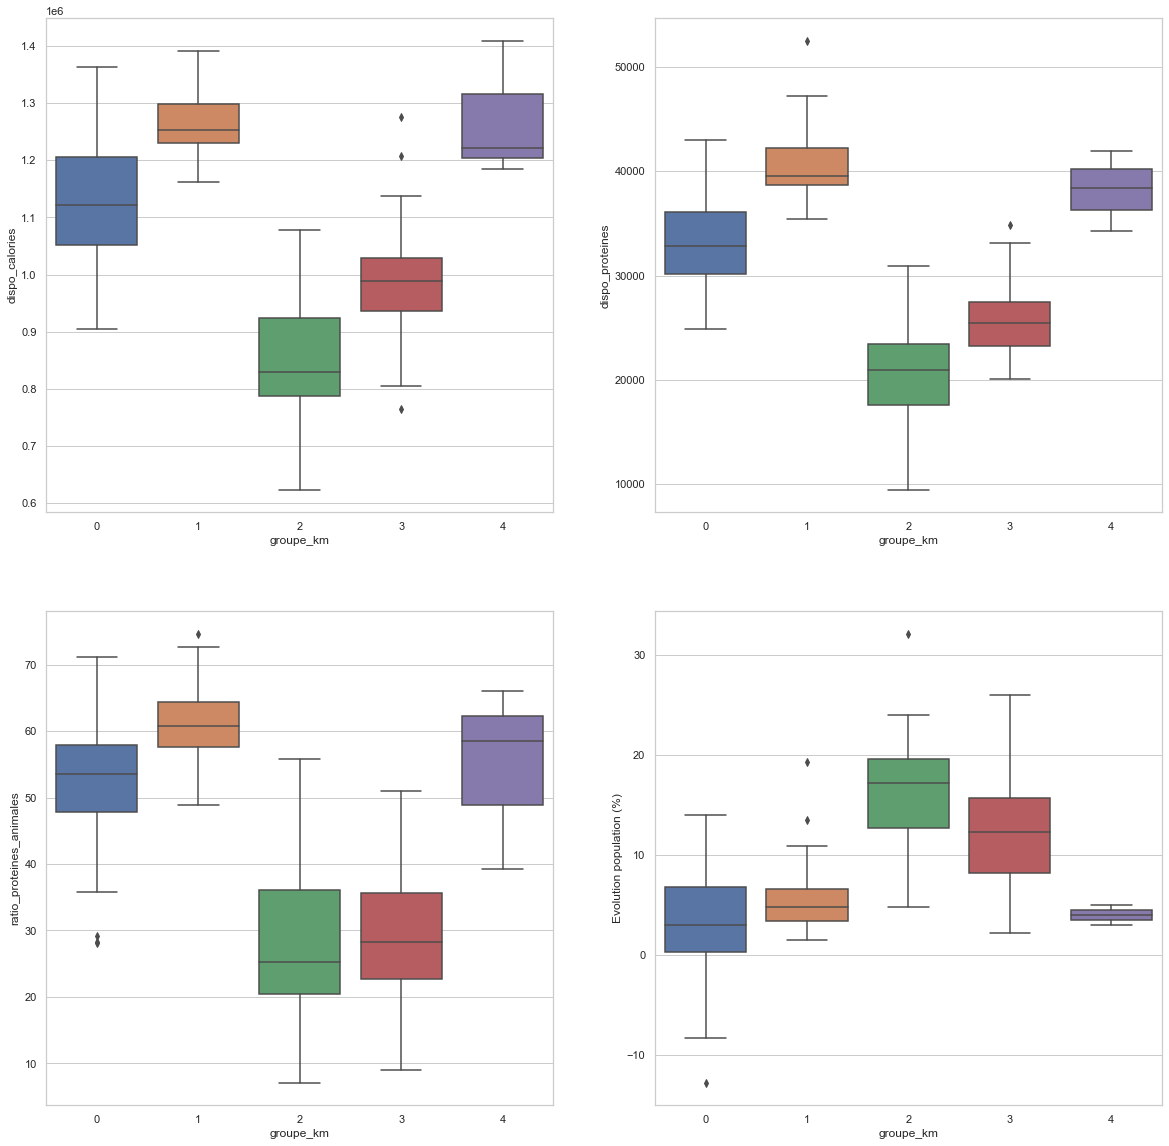

In [156]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='ratio_proteines_animales')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='Evolution population (%)')

plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

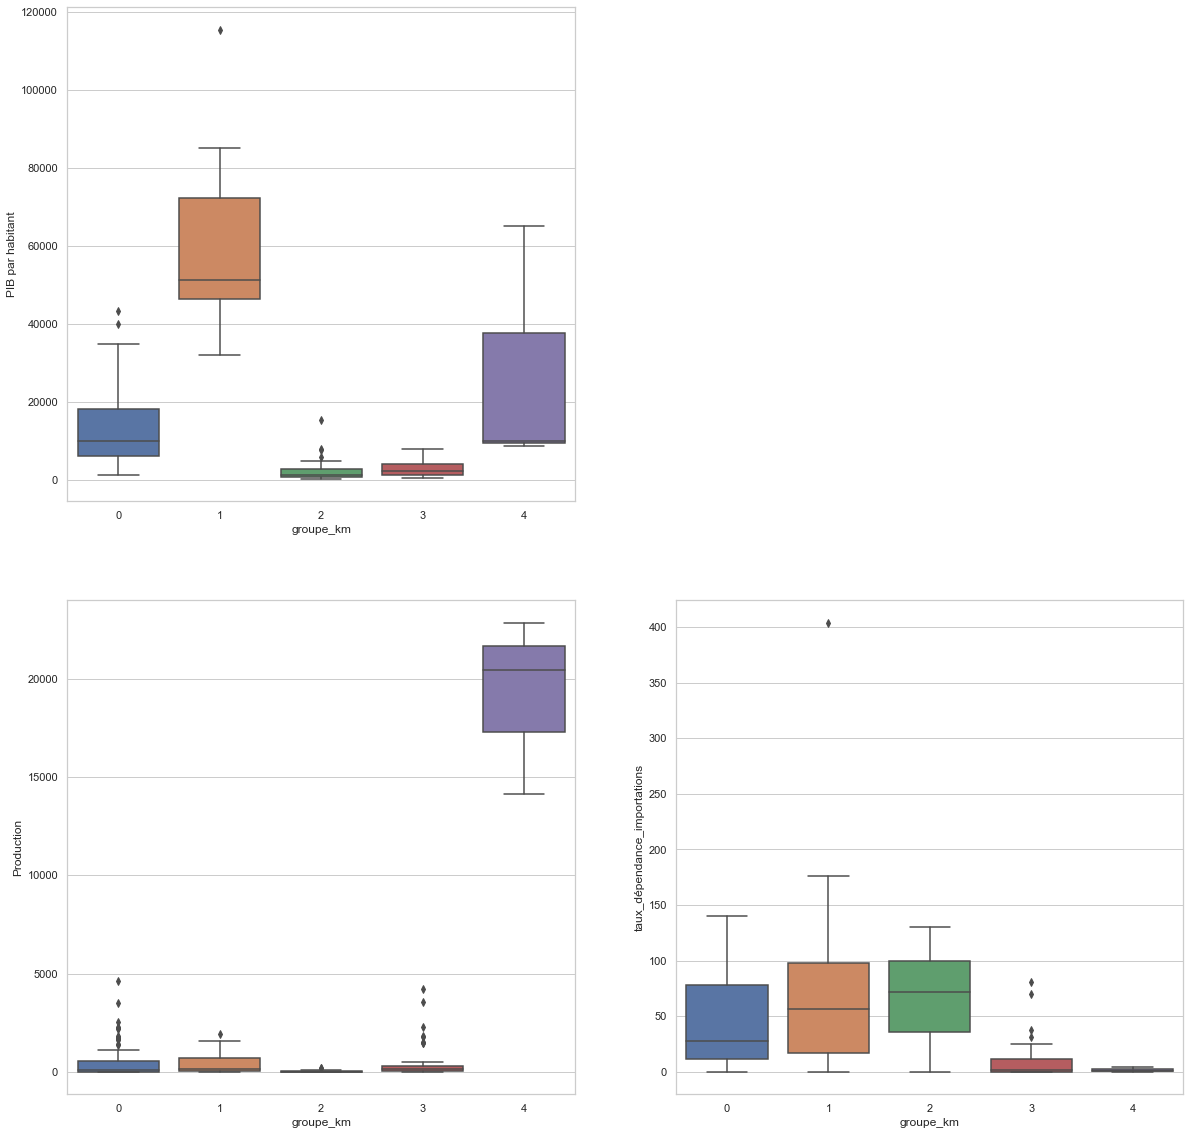

In [157]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les num√©ros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='PIB par habitant')


plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='Production')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_d√©pendance_importations')

plt.savefig("exports/boxplot_dendogramme4.png")
plt.show(block=False)





En se basant sur les m√™mes crit√®res que lors de la s√©lection des pays par CAH (√©volution importante de la population et bilan alimentaire trop faible), les clusters Kmeans √† selectionner sont  clusters0 et clusters 4

In [158]:
#Affichage des pays retenus dans ce clustering
#S√©lection selon l'importance du ratio des prot√©ines animales et dispo. calorique en r√©ponse 
#d'une probl√©matique cibl√©e sur le r√©gime alimentaire des pays
print('groupe 1')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 0]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 2')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 1]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 3')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 2]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 4')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 3]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 5')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 4]['Zone'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')




groupe 1
----------
['Arm√©nie' 'Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Bahamas' 'Barbade'
 'Bulgarie' 'Myanmar' 'Chili' 'Colombie' 'Costa Rica' 'Cuba' 'Chypre'
 'Azerba√Ødjan' 'Dominique' 'R√©publique dominicaine' 'B√©larus' 'Estonie'
 'Fidji' 'Polyn√©sie fran√ßaise' 'G√©orgie' 'Bosnie-Herz√©govine' 'Kiribati'
 'Gr√®ce' 'Grenade' 'Guyana' 'Hongrie' 'Croatie' 'Italie' 'Kazakhstan'
 'Jama√Øque' 'Japon' 'R√©publique de Cor√©e' 'Lettonie' 'Libye' 'Lituanie'
 'Malaisie' 'Maurice' 'Mexique' 'Mongolie' 'Maroc' 'R√©publique de Moldova'
 'Nouvelle-Cal√©donie' 'Mac√©doine du Nord' 'Nouvelle-Z√©lande' 'Panama'
 'Tch√©quie' 'P√©rou' 'Pologne' 'Portugal' 'Roumanie' 'F√©d√©ration de Russie'
 'Saint-Kitts-et-Nevis' 'Sainte-Lucie' 'Saint-Vincent-et-les Grenadines'
 'Arabie saoudite' 'Seychelles' 'Slov√©nie' 'Slovaquie' 'Espagne'
 'Suriname' 'R√©publique arabe syrienne' 'Turkm√©nistan' 'Trinit√©-et-Tobago'
 'Tunisie' 'Turquie' 'Ukraine' 'Uruguay' 'Ouzb√©kistan' 'Viet Nam' 'Samoa'
 'Serbie' 'Mont√©

In [159]:
#La correspondance avec les groupes du partitionnement hi√©rarchique peut-√™tre analys√©e avec une m√©thode .crosstab()
pd.crosstab(clusters_cah, cls5.labels_)



col_0   0   1   2   3  4
row_0                   
1      28   1   1  23  0
2       2   0  36  17  0
3       0   0   0   0  3
4       0  10   0   0  0
5      43   9   0   0  0

In [162]:
#Cr√©ation d'un sous-ensemble avec s√©lection des pays des deux clusters 1 & 2 valid√©s
df_cls_subset = df_cls5.query('[1] in groupe_km') 
df_cls_subset.shape

(20, 9)

In [163]:
#Visualisation des premi√®res lignes de notre nouvel √©chantillon 
#Les correspondances des clusters sont bien int√©gr√©s‚Ä¶
df_cls_subset.head(28)

Zone  \
7                                            Australie   
8                                             Autriche   
21                                              Canada   
36                                            Danemark   
45                                            Finlande   
50                                           Allemagne   
61                            Chine - RAS de Hong-Kong   
64                                             Islande   
69                                             Irlande   
70                                              Isra√´l   
82                                              Kowe√Øt   
90                                Chine - RAS de Macao   
95                                               Malte   
105                                           Pays-Bas   
113                                            Norv√®ge   
144                                              Su√®de   
145                                             Suisse   
156  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
168                                           Belgique   
169                                         Luxembourg   

     Evolution population (%)  dispo_calories  dispo_proteines  \
7                       8.378       1247205.0         39398.10   
8                       4.662       1347215.0         39766.75   
21                      5.991       1291735.0         39620.75   
36                      2.372       1248665.0         42113.70   
45                      1.713       1211800.0         42876.55   
50                      2.886       1299035.0         38047.60   
61                      4.900       1181140.0         47249.25   
64                      3.620       1327505.0         52538.10   
69                      5.787       1391015.0         40533.25   
70                     10.143       1298670.0         46026.50   
82                     19.303       1258885.0         36872.30   
90                     10.924       1208880.0         39168.15   
95                      3.337       1233335.0         38456.40   
105                     1.506       1223845.0         39460.15   
113                     5.894       1258885.0         42442.20   
144                     4.350       1162160.0         39456.50   
145                     5.950       1233335.0         35463.40   
156                     3.918       1239175.0         38759.35   
168                     3.455       1387000.0         36624.10   
169                    13.486       1278960.0         39766.75   

     ratio_proteines_animales  PIB par habitant  Production  \
7                      67.547      54763.202388      1278.0   
8                      59.192      49700.761833       132.0   
21                     56.306      46550.335507      1504.0   
36                     66.493      60656.938517       158.0   
45                     62.152      48678.365212       139.0   
50                     60.150      46231.563366      1544.0   
61                     74.662      49180.094302        19.0   
64                     72.690      71344.613669        10.0   
69                     57.046      81636.578555       154.0   
70                     60.563      46376.466510       617.0   
82                     48.911      31999.271891        56.0   
90                     64.458      84096.705446         3.0   
95                     57.783      33752.370516         4.0   
105                    64.351      53052.814311      1036.0   
113                    55.392      74985.515257       107.0   
144                    64.154      52895.956700       158.0   
145                    63.102      85134.954826        99.0   
156                    55.429      41854.503068      1902.0   
168                    60.375      46198.310321       448.0   
169                    61.083     115480.867570         0.0   

     taux_d√©pendance_importations  groupe_km  
7                        0.724055          1  
8                    

In [164]:
#Visualisation des premi√®res lignes de notre nouvel √©chantillon 
#Les correspondances des clusters sont bien int√©gr√©s‚Ä¶
df_cls_subset['Zone'].unique()

array(['Australie', 'Autriche', 'Canada', 'Danemark', 'Finlande',
       'Allemagne', 'Chine - RAS de Hong-Kong', 'Islande', 'Irlande',
       'Isra√´l', 'Kowe√Øt', 'Chine - RAS de Macao', 'Malte', 'Pays-Bas',
       'Norv√®ge', 'Su√®de', 'Suisse',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Belgique',
       'Luxembourg'], dtype=object)

Liste des pays et recommandations
Dans un premier temps, on sugg√®re donc de cibler les pays de l'UE, pour leur proximit√© et la facilit√© des √©changes commerciaux : l'Allemagne,  les Pays-Bas, la Su√®de ,Luxembourg et l'Italie.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les √©changes commerciaux avec l'UE sont actuellement compliqu√©s. Pour autant, consid√©rant les int√©r√™ts √©conomiques mutuels, les r√©centes directives qui ont √©t√© prises pour favoriser ces √©changes sont en notre faveur.

Dans un second temps, on pourrait √©galement cibler les pays comme Hong Kong, le Japon, , ainsi que le Kowe√Øt et l'Arabie saoudite..

FAO - Poultry production - March√©s et commerce
https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Br√©sil est le principal exportateur de viande de volaille, suivi par les √âtats-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avanc√©s sont de plus en plus d√©pendants des importations de viande de volaille. Le niveau de leurs importations est pass√© de 3 pour cent en 1961 √† environ 30 pour cent en 2013."

FAO - Poultry production

https://www.fao.org/poultry-production-products/production/fr/

"Les √âtats-Unis d'Am√©rique sont le plus grand producteur de viande de volaille √† l‚Äô√©chelle de la plan√®te: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Br√©sil."

"Pour r√©pondre √† la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 √† 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille repr√©sentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en d√©veloppement, environ 80 pour cent des m√©nages ruraux √©l√®vent des volailles."

# Tests statistiques
## Nos groupes sont-ils r√©ellement distincts?
### Test d'ad√©quation de Kolmogorov-Smirnov :
On peut tester l‚Äôad√©quation de la 'Disponibilit√© alimentaire de prot (g/personne/jour)' √† une loi normale √† l‚Äôaide de Kolmogorov-Smirnov. Le test sera doubl√© par celui de Shapiro-Wilk.

In [165]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### V√©rification des hypoth√®ses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [166]:
df_groupes_cah.head(1)

Zone  Evolution population (%)  dispo_calories  dispo_proteines  \
0  Arm√©nie                     2.076       1103030.0         34415.85   

   ratio_proteines_animales  PIB par habitant  Production  \
0                    56.061       4622.733216        12.0   

   taux_d√©pendance_importations  groupe_cah  
0                     78.181818           5

In [167]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interpr√©tation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5¬†%')
else:
    print('H0 est rejet√©e √† un niveau de test de 5%')
    

Statistics=0.058, p=0.936
 Nous pouvons accepter H0 pour des niveaux de test de 5¬†%


### Test d'ad√©quation de Shapiro-Wilk :

*Recommand√© pour tester la normalit√© dans le cas de petits √©chantillons.

In [168]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 3) | (df_groupes_cah['groupe_cah'] == 5)]

In [169]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

In [170]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')



W          pval  normal
Evolution population (%)      0.985948  7.662701e-01    True
dispo_calories                0.968237  1.533053e-01    True
dispo_proteines               0.977826  4.006625e-01    True
ratio_proteines_animales      0.952010  2.823269e-02   False
PIB par habitant              0.909182  5.276065e-04   False
Production                    0.369831  5.441432e-14   False
taux_d√©pendance_importations  0.930504  3.451476e-03   False

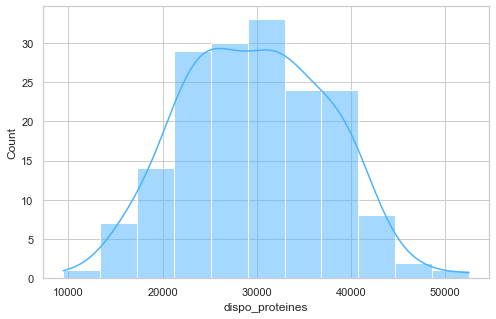

In [171]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.show()

#### Disponibilit√© alimentaire √©nerg√©tique


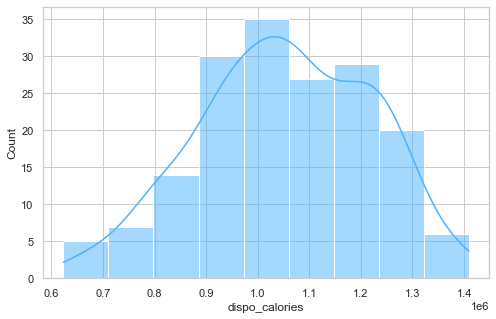

In [172]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_calories', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


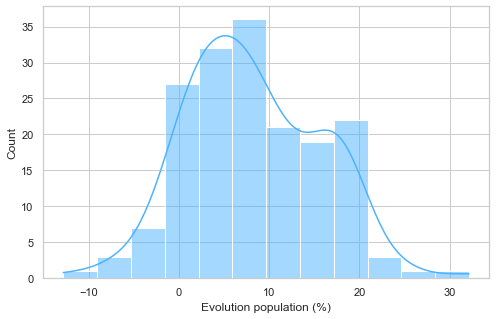

In [173]:
#histogram
sns.histplot(data=df_groupes_cah, x='Evolution population (%)', kde=True, color='#4cb2ff')
plt.show()

#### Pourcentage de prot√©ine animale


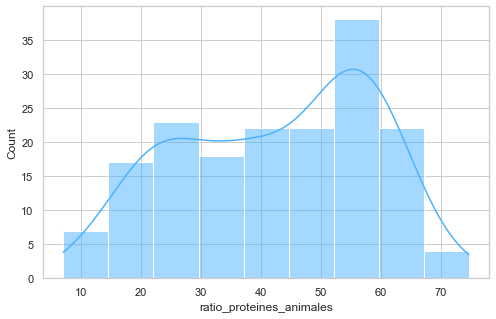

In [174]:
#histogram
sns.histplot(data=df_groupes_cah, x='ratio_proteines_animales', kde=True, color='#4cb2ff')
plt.show()

#### Produit Int√©rieur Brut


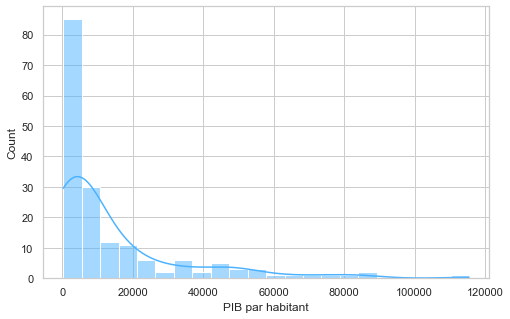

In [175]:
#histogram
sns.histplot(data=df_groupes_cah, x='PIB par habitant', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


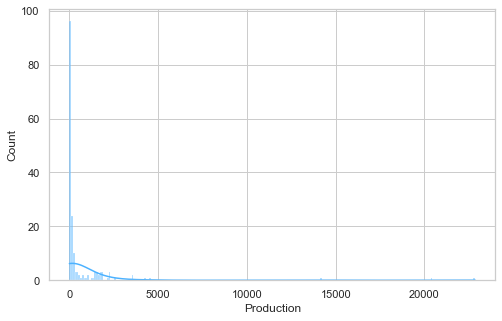

In [176]:
#histogram
sns.histplot(data=df_groupes_cah, x='Production', kde=True, color='#4cb2ff')
plt.show()


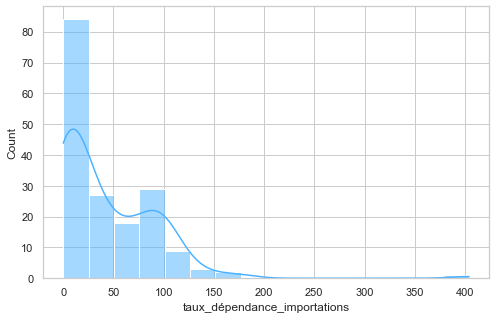

In [177]:
#histogram
sns.histplot(data=df_groupes_cah, x='taux_d√©pendance_importations', kde=True, color='#4cb2ff')
plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.



#### La variable 'dispo_proteines' suit une loi normale et sera par cons√©quent choisie pour le test.

In [178]:
#On teste tout d‚Äôabord l‚Äô√©galit√© des variances √† l‚Äôaide de la commande
pg.homoscedasticity(c4c5, dv='dispo_proteines', 
                    group='groupe_cah', method='levene', 
                    alpha=0.05)

W      pval  equal_var
levene  0.841204  0.363207       True

In [179]:
#On teste ensuite l‚Äô√©galit√© des moyennes √† l‚Äôaide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

T       dof alternative   p-val                 CI95%  \
T-test  1.289758  2.367614   two-sided  0.3087  [-5673.77, 11691.59]   

         cohen-d   BF10     power  
T-test  0.632399  0.784  0.181648

### Conclusion

In [180]:
Œ± = 0.05

if Œ± > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value √©tant inf√©rieure au risque Œ±, on rejette donc H0, les moyennes des deux groupes sont diff√©rentes.")
else :
    print("La p-value √©tant sup√©rieur au risque Œ±, H0 est donc vrai, les moyennes des deux groupes sont √©gales.")

La p-value √©tant sup√©rieur au risque Œ±, H0 est donc vrai, les moyennes des deux groupes sont √©gales.
